In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# read excel data
def read_excel_data(excel_file):
    df = pd.read_csv(excel_file)
    return df
df = read_excel_data('Dataset-vf.csv')

In [3]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


In [4]:
#report numerical data
display(df.describe(include=[np.number]))

#check for null values
display(df.isnull().sum())


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12
count,6124.000000,5520.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000
mean,47.550621,151.293659,16.794579,192.488080,1541.308459,2645.712933,1442.194154,216.777106,218.770411,129.345852,0.493588,6.209993
std,57.465790,103.437461,8.995704,179.689943,1296.494523,393.799727,1123.945559,30.475508,23.550070,48.693500,0.290903,573.410551
min,-134.000000,0.000000,0.000000,0.000000,0.000000,1903.000000,30.000000,59.000000,99.000000,0.000000,0.000000,-1000.000000
25%,2.000000,71.000000,10.000000,42.000000,636.000000,2287.000000,663.000000,202.000000,207.000000,97.000000,0.240000,-492.250000
50%,27.000000,122.000000,15.000000,150.000000,1158.000000,2699.000000,1189.000000,224.000000,223.000000,134.000000,0.490000,21.000000
75%,77.000000,230.250000,23.000000,295.000000,2010.500000,2939.250000,1879.000000,239.000000,236.000000,163.000000,0.750000,495.000000
max,334.000000,359.000000,49.000000,1129.000000,6890.000000,3675.000000,6853.000000,254.000000,254.000000,248.000000,1.000000,1000.000000


X5        0
X2      604
X3        0
X4        0
X6        0
X1        0
X10       0
X7        0
X8        0
X9        0
X11       0
X12       0
X15    5523
X13       0
X14       0
Y         0
dtype: int64

In [5]:
print(df['X15'].value_counts())
print(df.shape)

X15
R3    229
R2    190
R1    181
R       1
Name: count, dtype: int64
(6124, 16)


## Dealing with Null Values

In [6]:
#replace null values with mean
df['X2'].fillna(df['X2'].mean(), inplace=True)
#delete column with null values
df.dropna(axis=1, inplace=True)

In [7]:
df.isnull().sum()


X5     0
X2     0
X3     0
X4     0
X6     0
X1     0
X10    0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

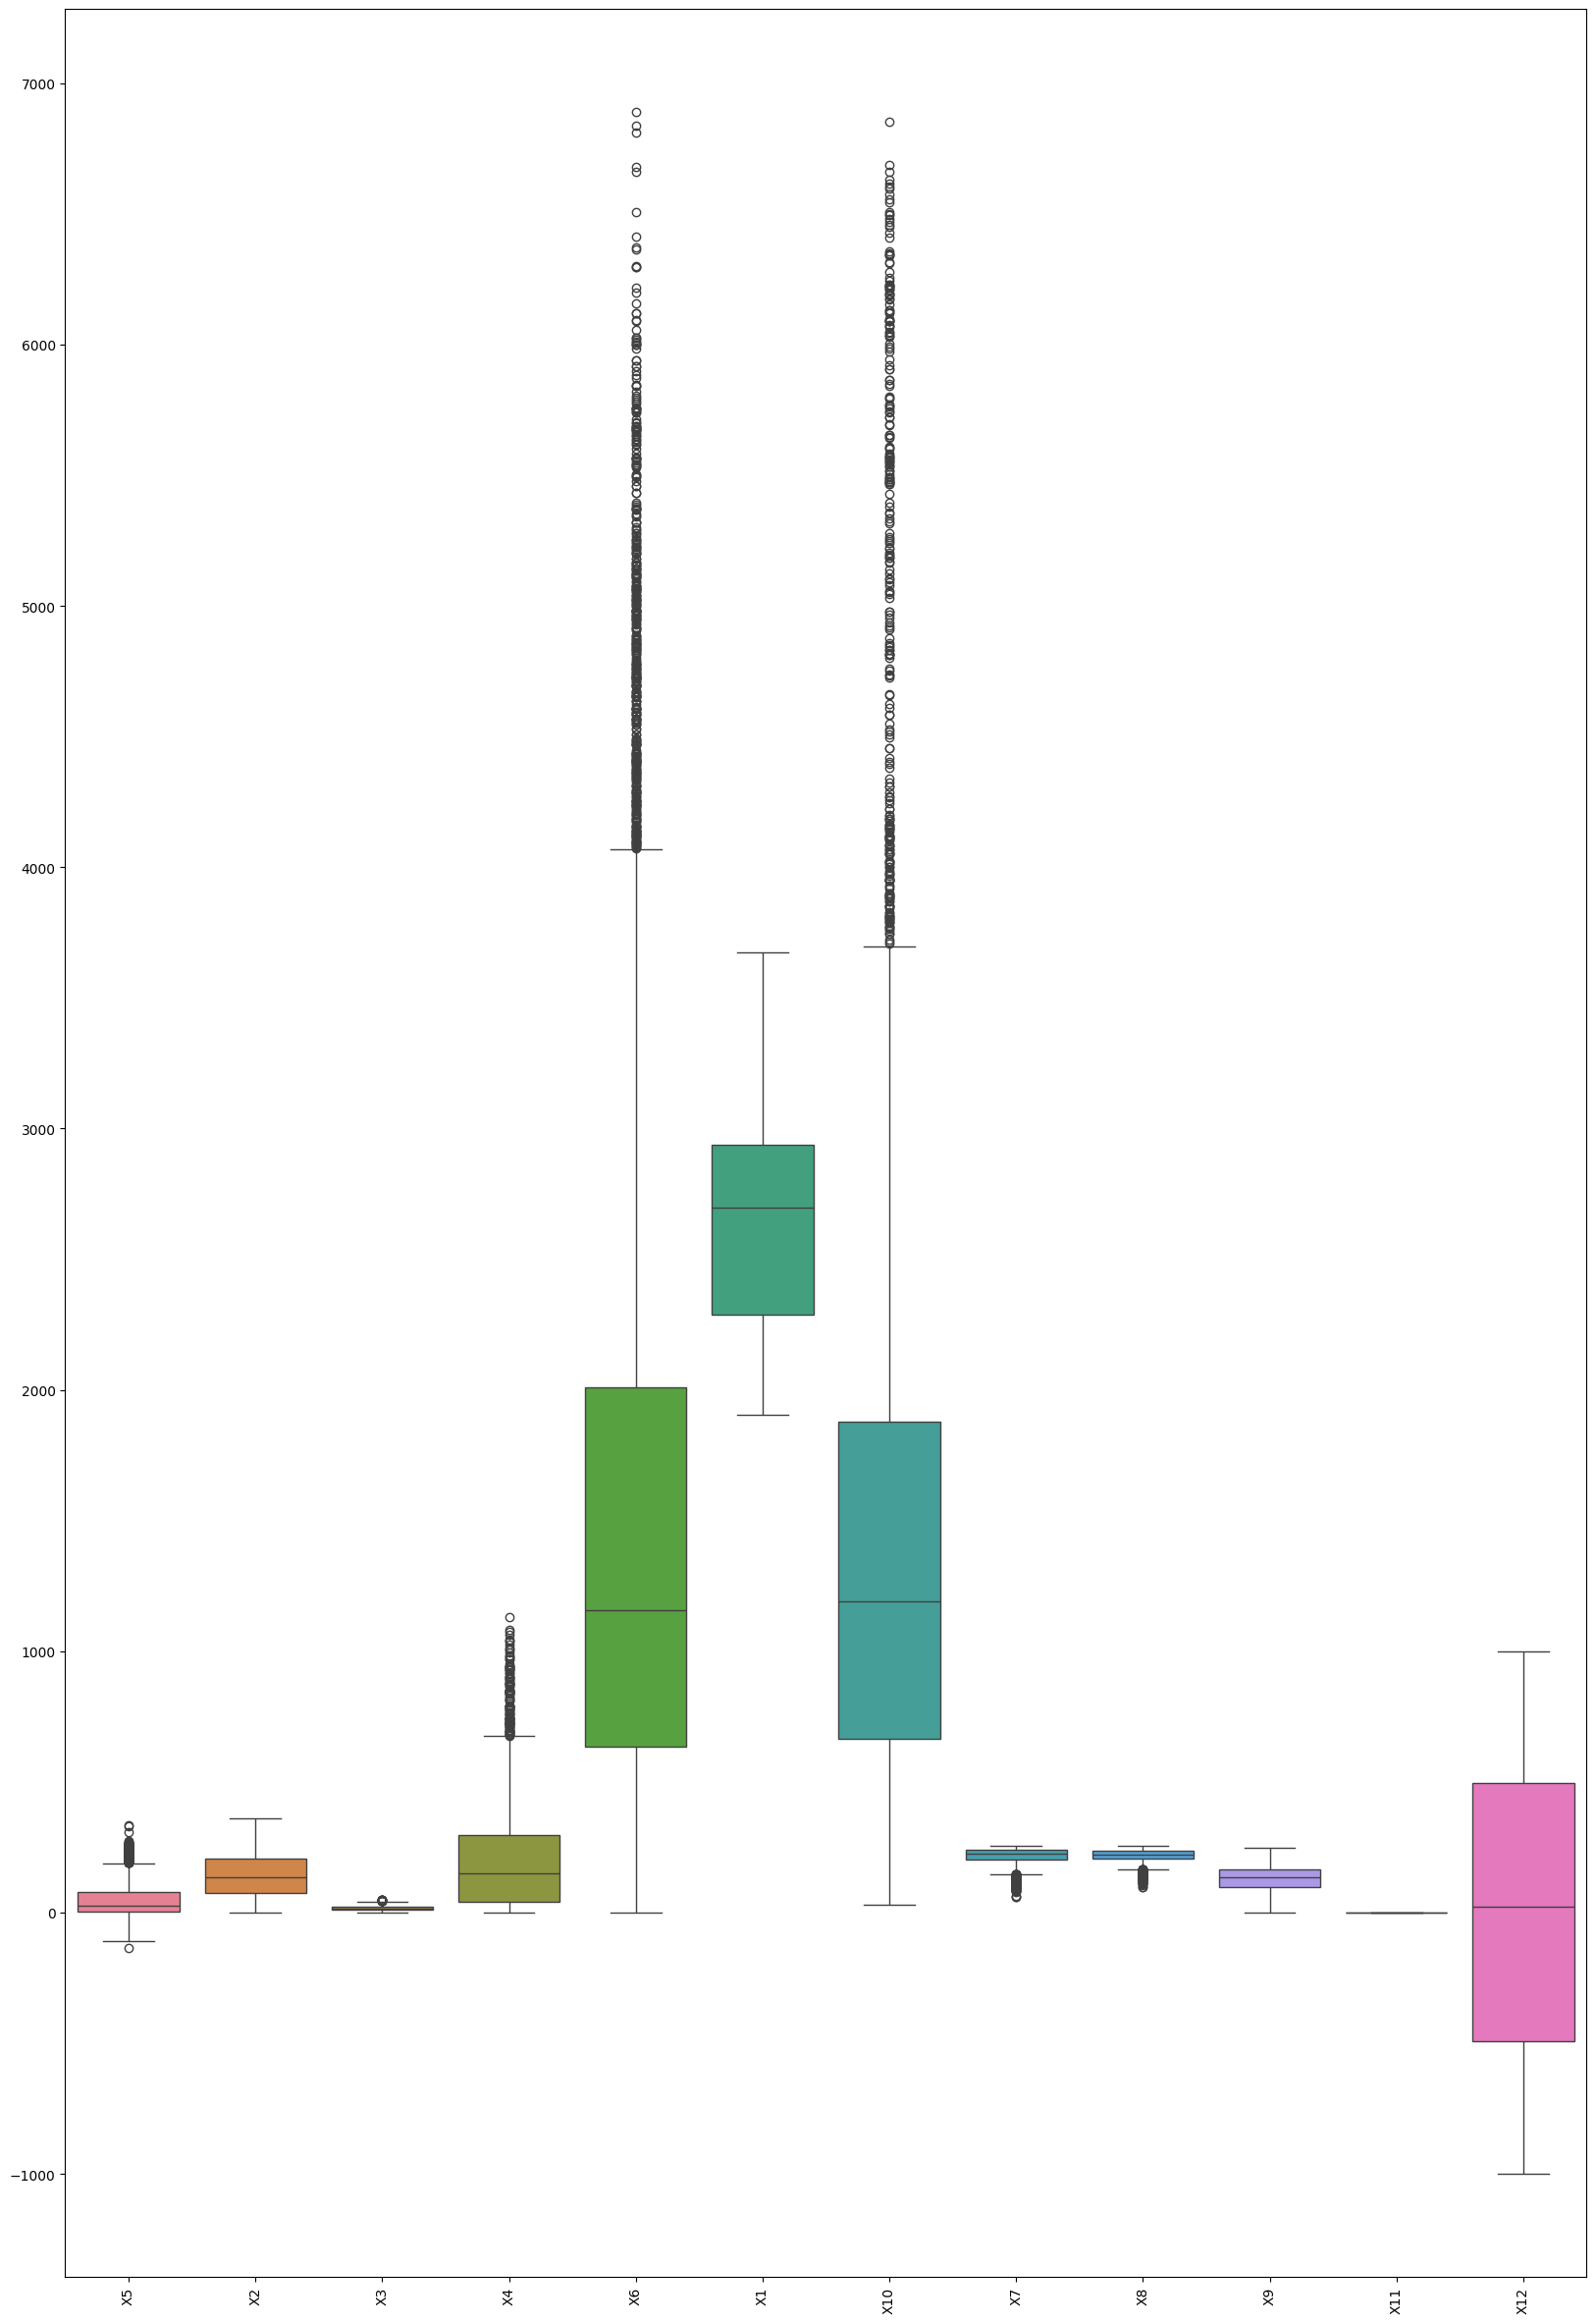

In [8]:
#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots

# fig, axs = plt.subplots(6, 2, figsize=(40, 80))
# for i in range(6):
#     for j in range(2):
#         plt1 = sns.boxplot(df[df.columns[i+j]], ax = axs[i,j])
#         plt1.set(xlabel=df.columns[i+j])
#         plt1.set_title(df.columns[i+j], fontsize=50)


# plt.tight_layout()

#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots
plt.figure(figsize=(20,30))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()





## Information of Categorical Data

In [9]:
#uniques of all columns
for i in ['X14', 'X13', 'Y']:
    print("Name:",i,"|Data", df[i].unique()," |Count",len(df[i].unique()))

Name: X14 |Data [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34' ' CA41' ' CA48' ' CA54' ' CA55']  |Count 32
Name: X13 |Data [' FC11' ' FC14' ' FC13' ' FC12']  |Count 4
Name: Y |Data ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']  |Count 6


In [10]:
# print number of unique value of Y and there number of values
print(df['Y'].value_counts())

Y
Mercedes    1620
BMW         1571
Toyota      1275
Honda       1250
GMC          308
Ford         100
Name: count, dtype: int64


In [245]:
# !pip install category_encoders

In [246]:
# !pip install imblearn

## Binary encoding of categorical data

In [13]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['X14', 'X13'])
df = encoder.fit_transform(df)

In [14]:
df.columns

Index(['X5', 'X2', 'X3', 'X4', 'X6', 'X1', 'X10', 'X7', 'X8', 'X9', 'X11',
       'X12', 'X13_0', 'X13_1', 'X13_2', 'X14_0', 'X14_1', 'X14_2', 'X14_3',
       'X14_4', 'X14_5', 'Y'],
      dtype='object')

## Splitting the data into training and testing data

In [15]:
#split data into train and test
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4286, 21) (1838, 21) (4286,) (1838,)


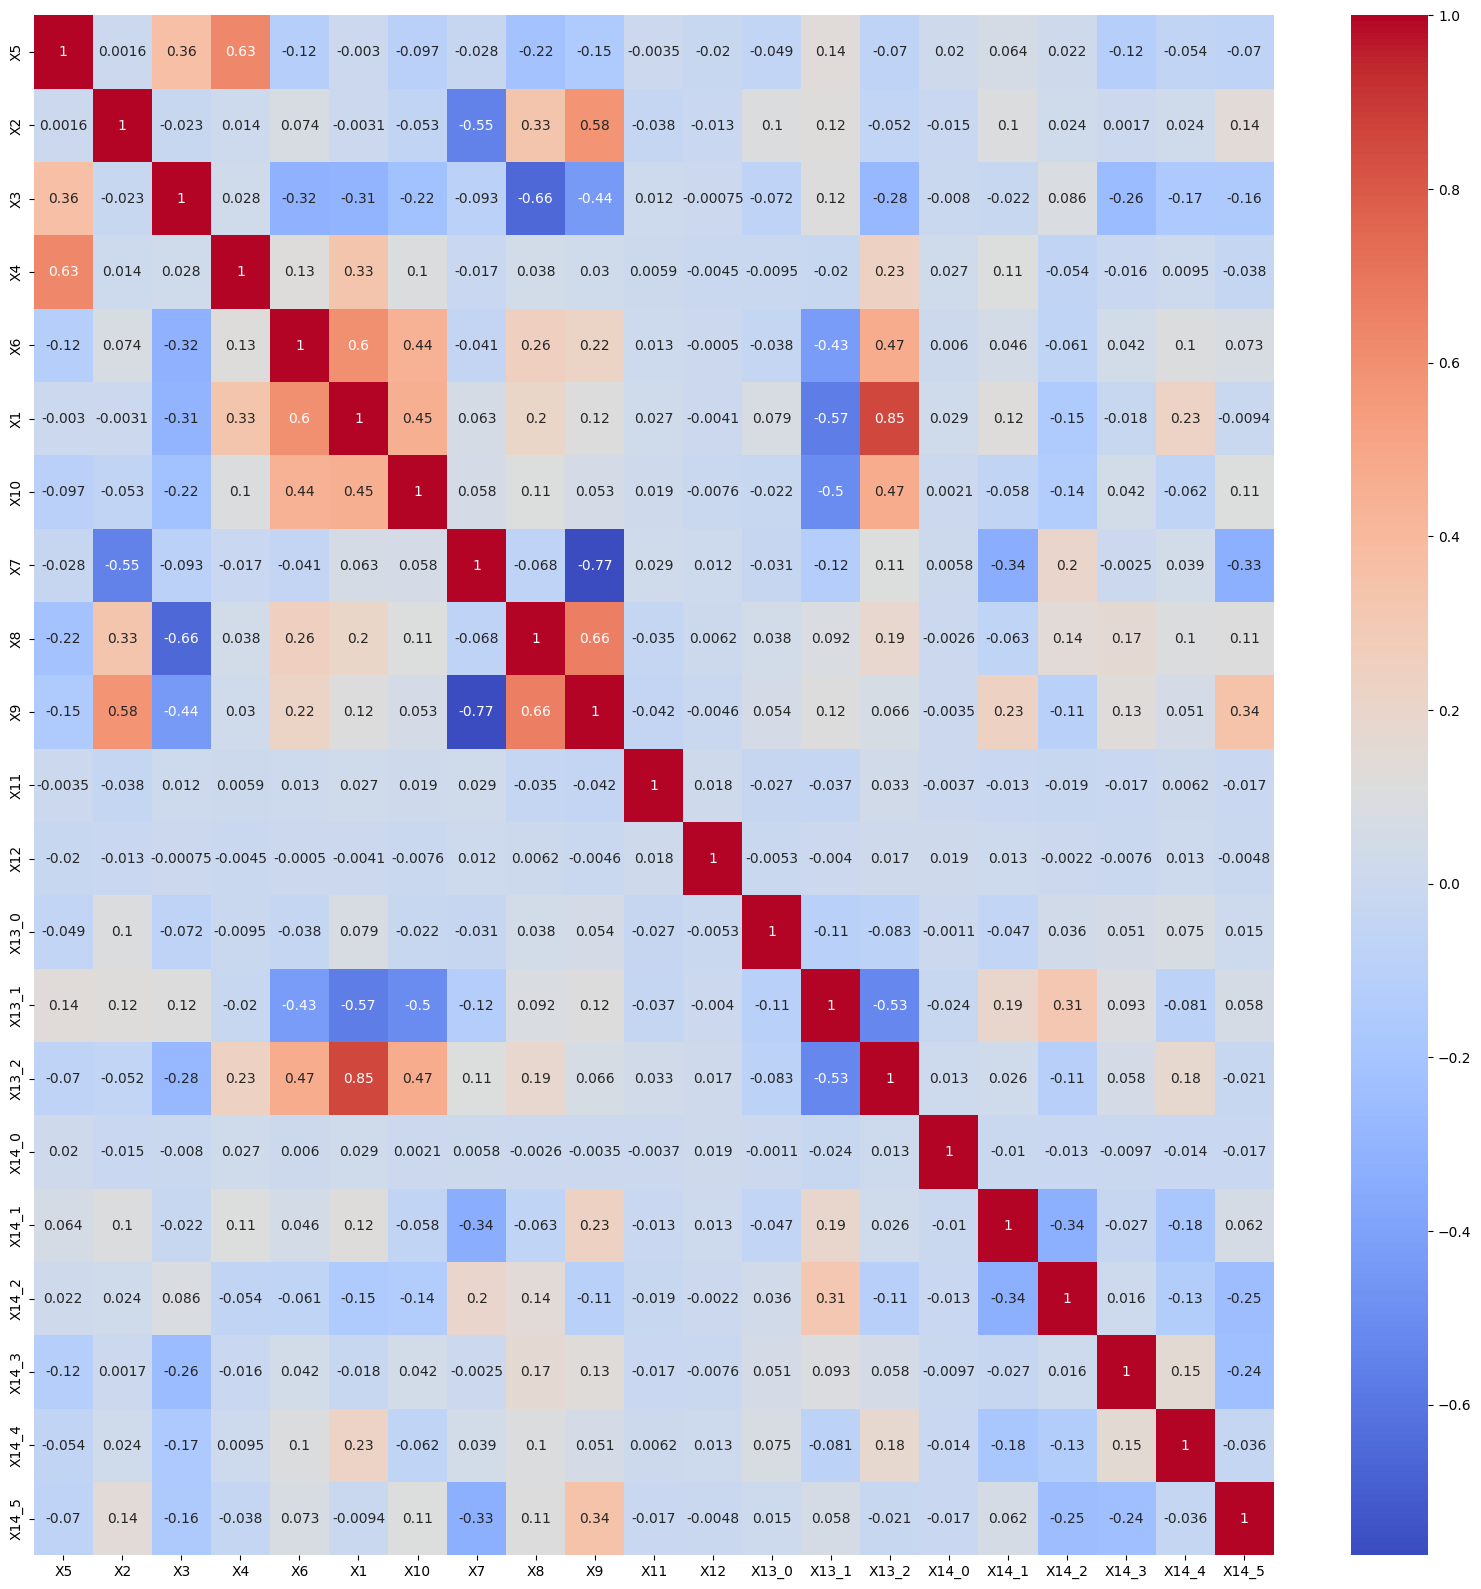

    Feature 1 Feature 2  Correlation
80         X6       X12    -0.000502
47         X3       X12    -0.000749
176     X13_0     X14_0    -0.001072
0          X5        X2     0.001569
36         X2     X14_3     0.001676
..        ...       ...          ...
2          X5        X4     0.631523
44         X3        X8    -0.656990
132        X8        X9     0.662837
120        X7        X9    -0.773337
98         X1     X13_2     0.854851

[210 rows x 3 columns]


In [16]:
# display correlation matrix

corr = X_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Take the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
correlation_pairs = upper_triangle.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_pairs = correlation_pairs.reindex(correlation_pairs.Correlation.abs().sort_values(ascending=True).index)
print(sorted_pairs)


In [247]:
# !pip install seaborn

## Dealing with Inbalance Data

Counter({'BMW': 1122, 'Mercedes': 1091, 'Toyota': 912, 'Honda': 873, 'GMC': 215, 'Ford': 73})


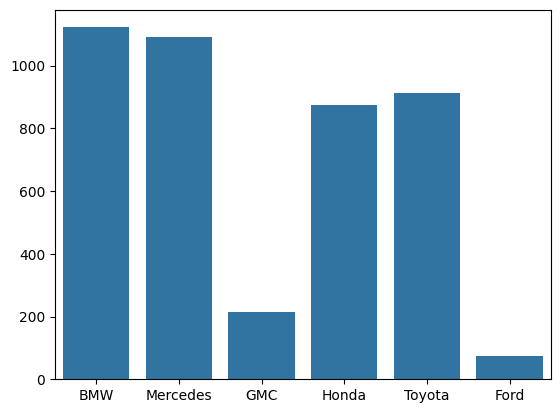

In [18]:
#SMOTE, oversampling, undersampling, SMOTEENN, SMOTETomek, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import SMOTE
from collections import Counter


# summarize class distribution
counter = Counter(y_train)
print(counter)

#plot barplot of y_train
keys = np.array(list(counter.keys()))
values = np.array(list(counter.values()))
sns.barplot(x=keys, y=values)
plt.show()



Counter({'BMW': 1122, 'Mercedes': 1122, 'GMC': 1122, 'Honda': 1122, 'Toyota': 1122, 'Ford': 1122})


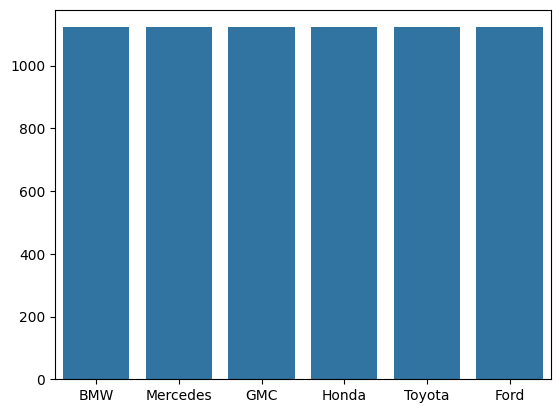

In [19]:
# transform the dataset
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


# summarize the new class distribution
counter = Counter(y_train)
print(counter)
#plot barplot of y_train
keys = np.array(list(counter.keys()))
values = np.array(list(counter.values()))
sns.barplot(x=keys, y=values)
plt.show()


## Binary encoding of y

In [20]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
# encoder = ce.BinaryEncoder()
print(X_train.shape, y_train.shape)
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

print(y_train_encoded.shape, y_test_encoded.shape)

(6732, 21) (6732,)
(6732, 6) (1838, 6)


In [21]:
# y_train.columns

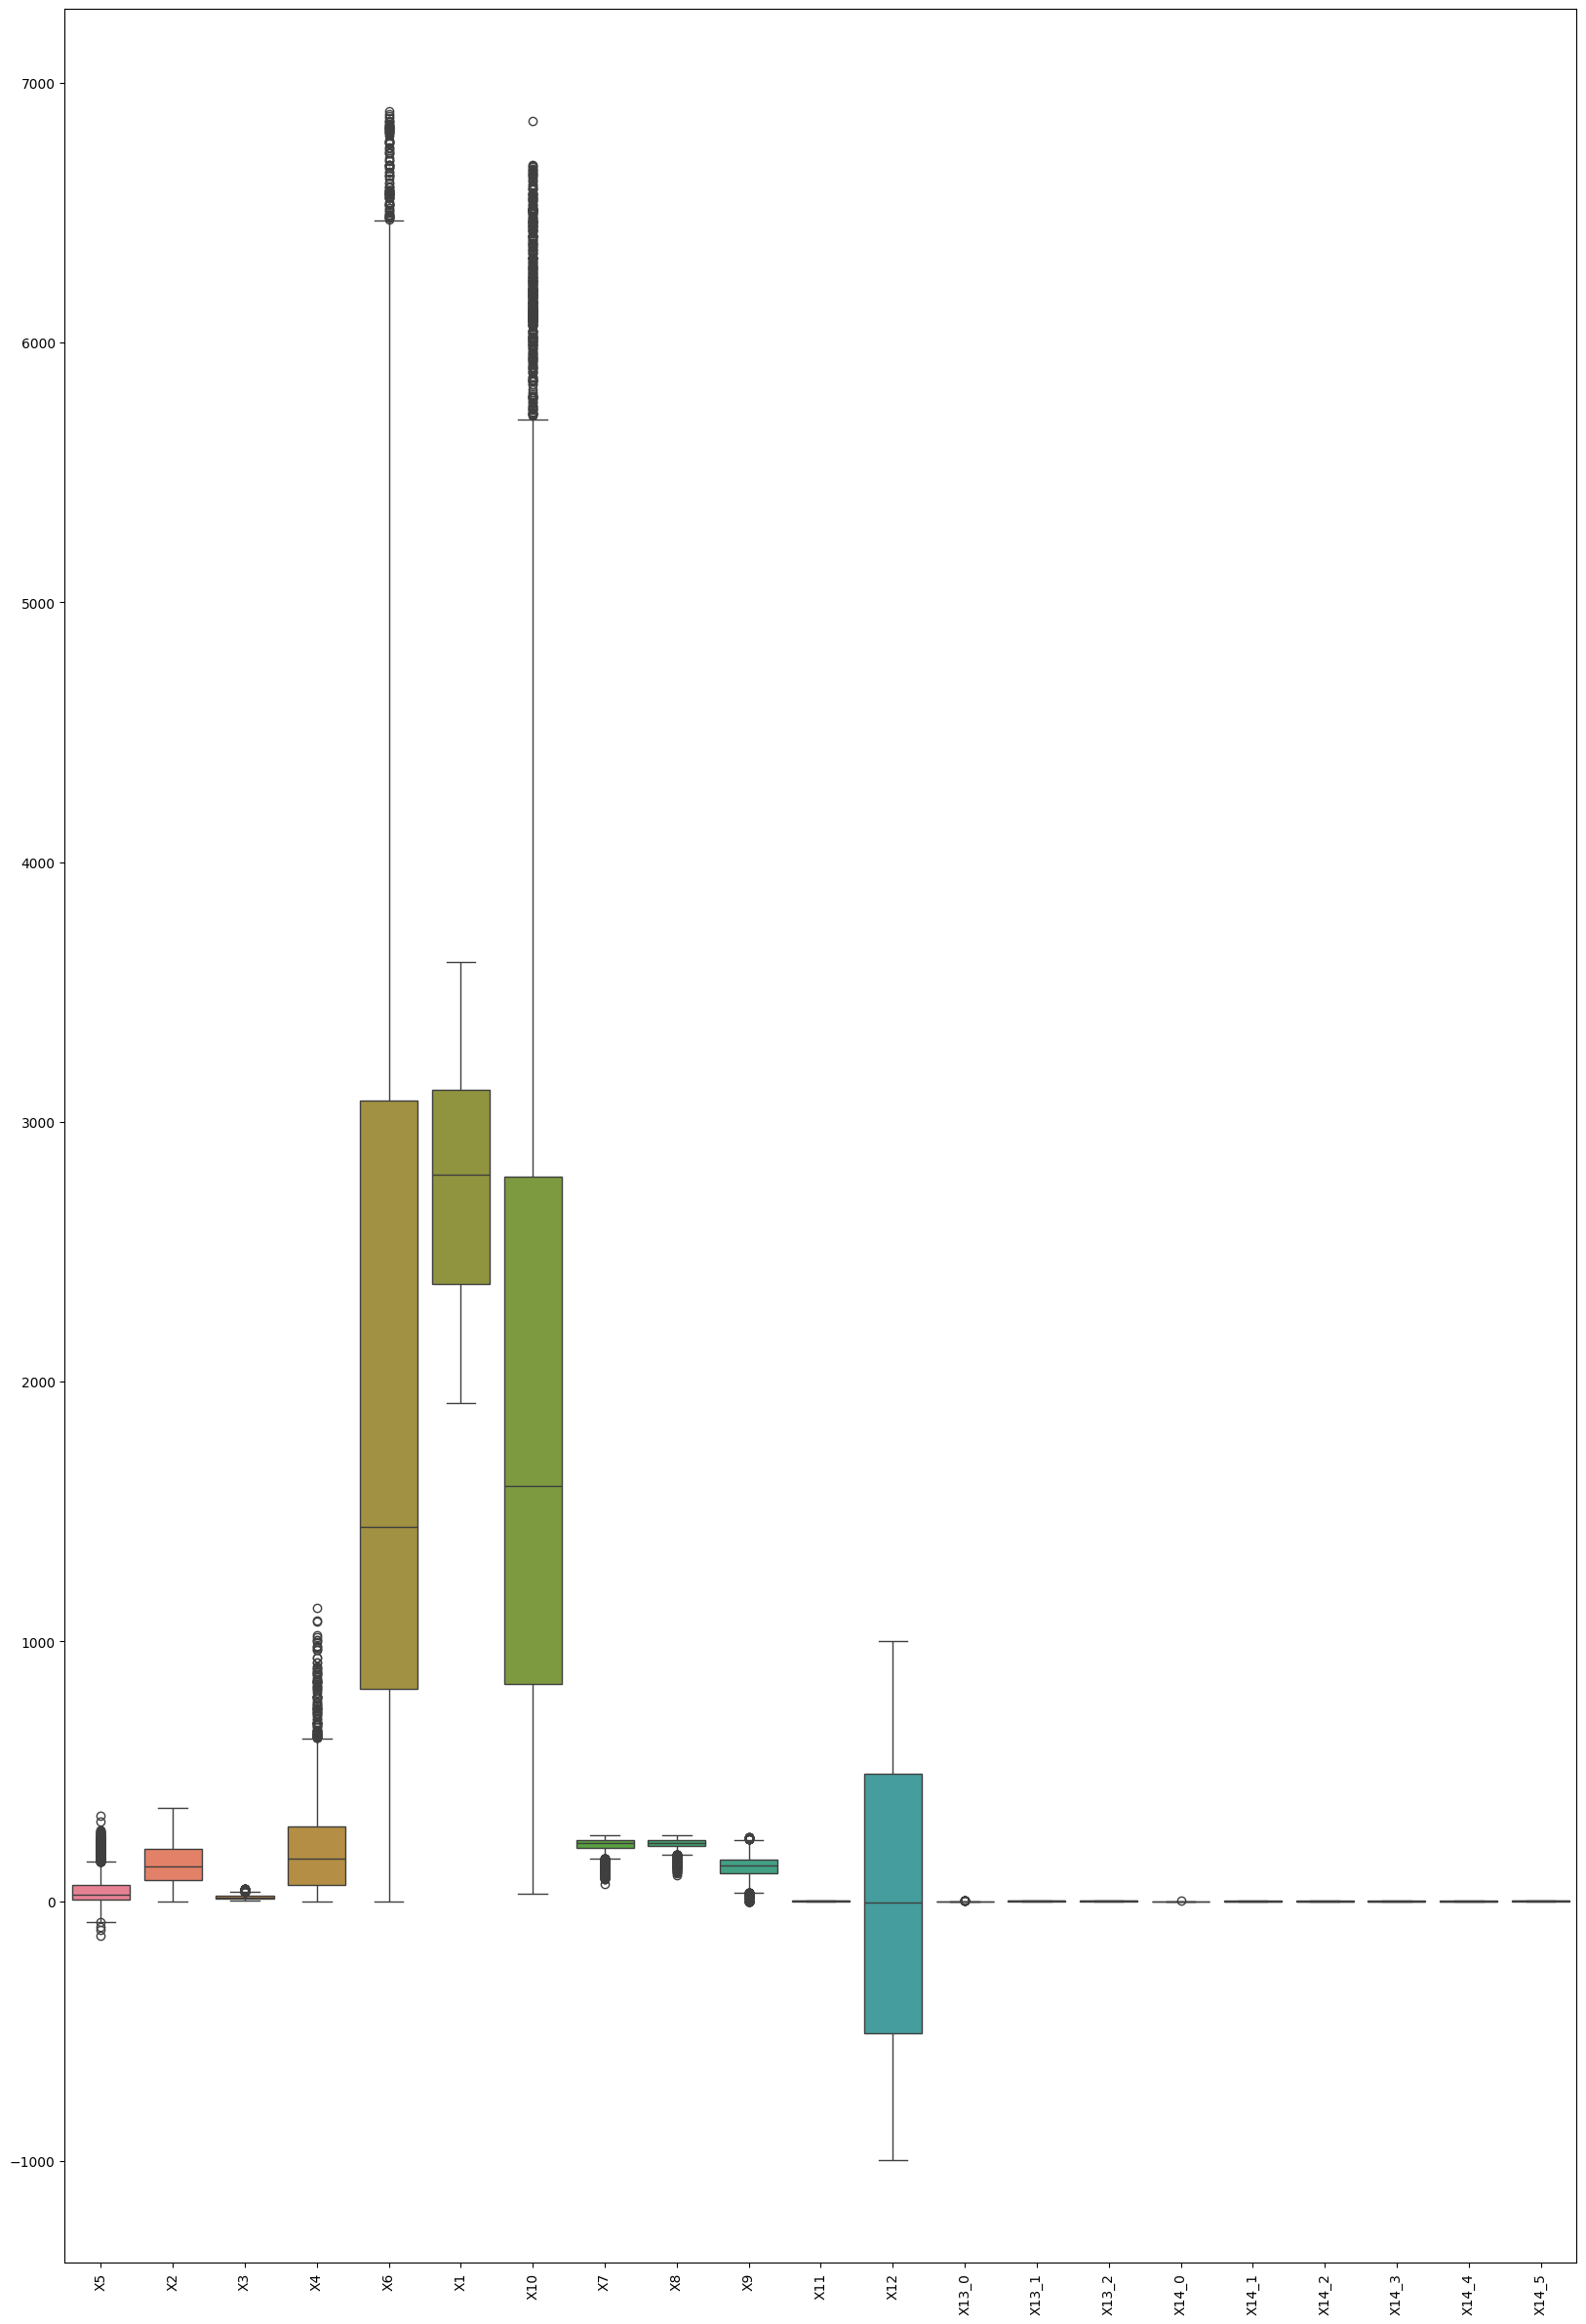

In [22]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

In [23]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)

(6732, 21) (1838, 21) (6732,) (1838,)
(6732, 21) (1838, 21) (6732, 6) (1838, 6)


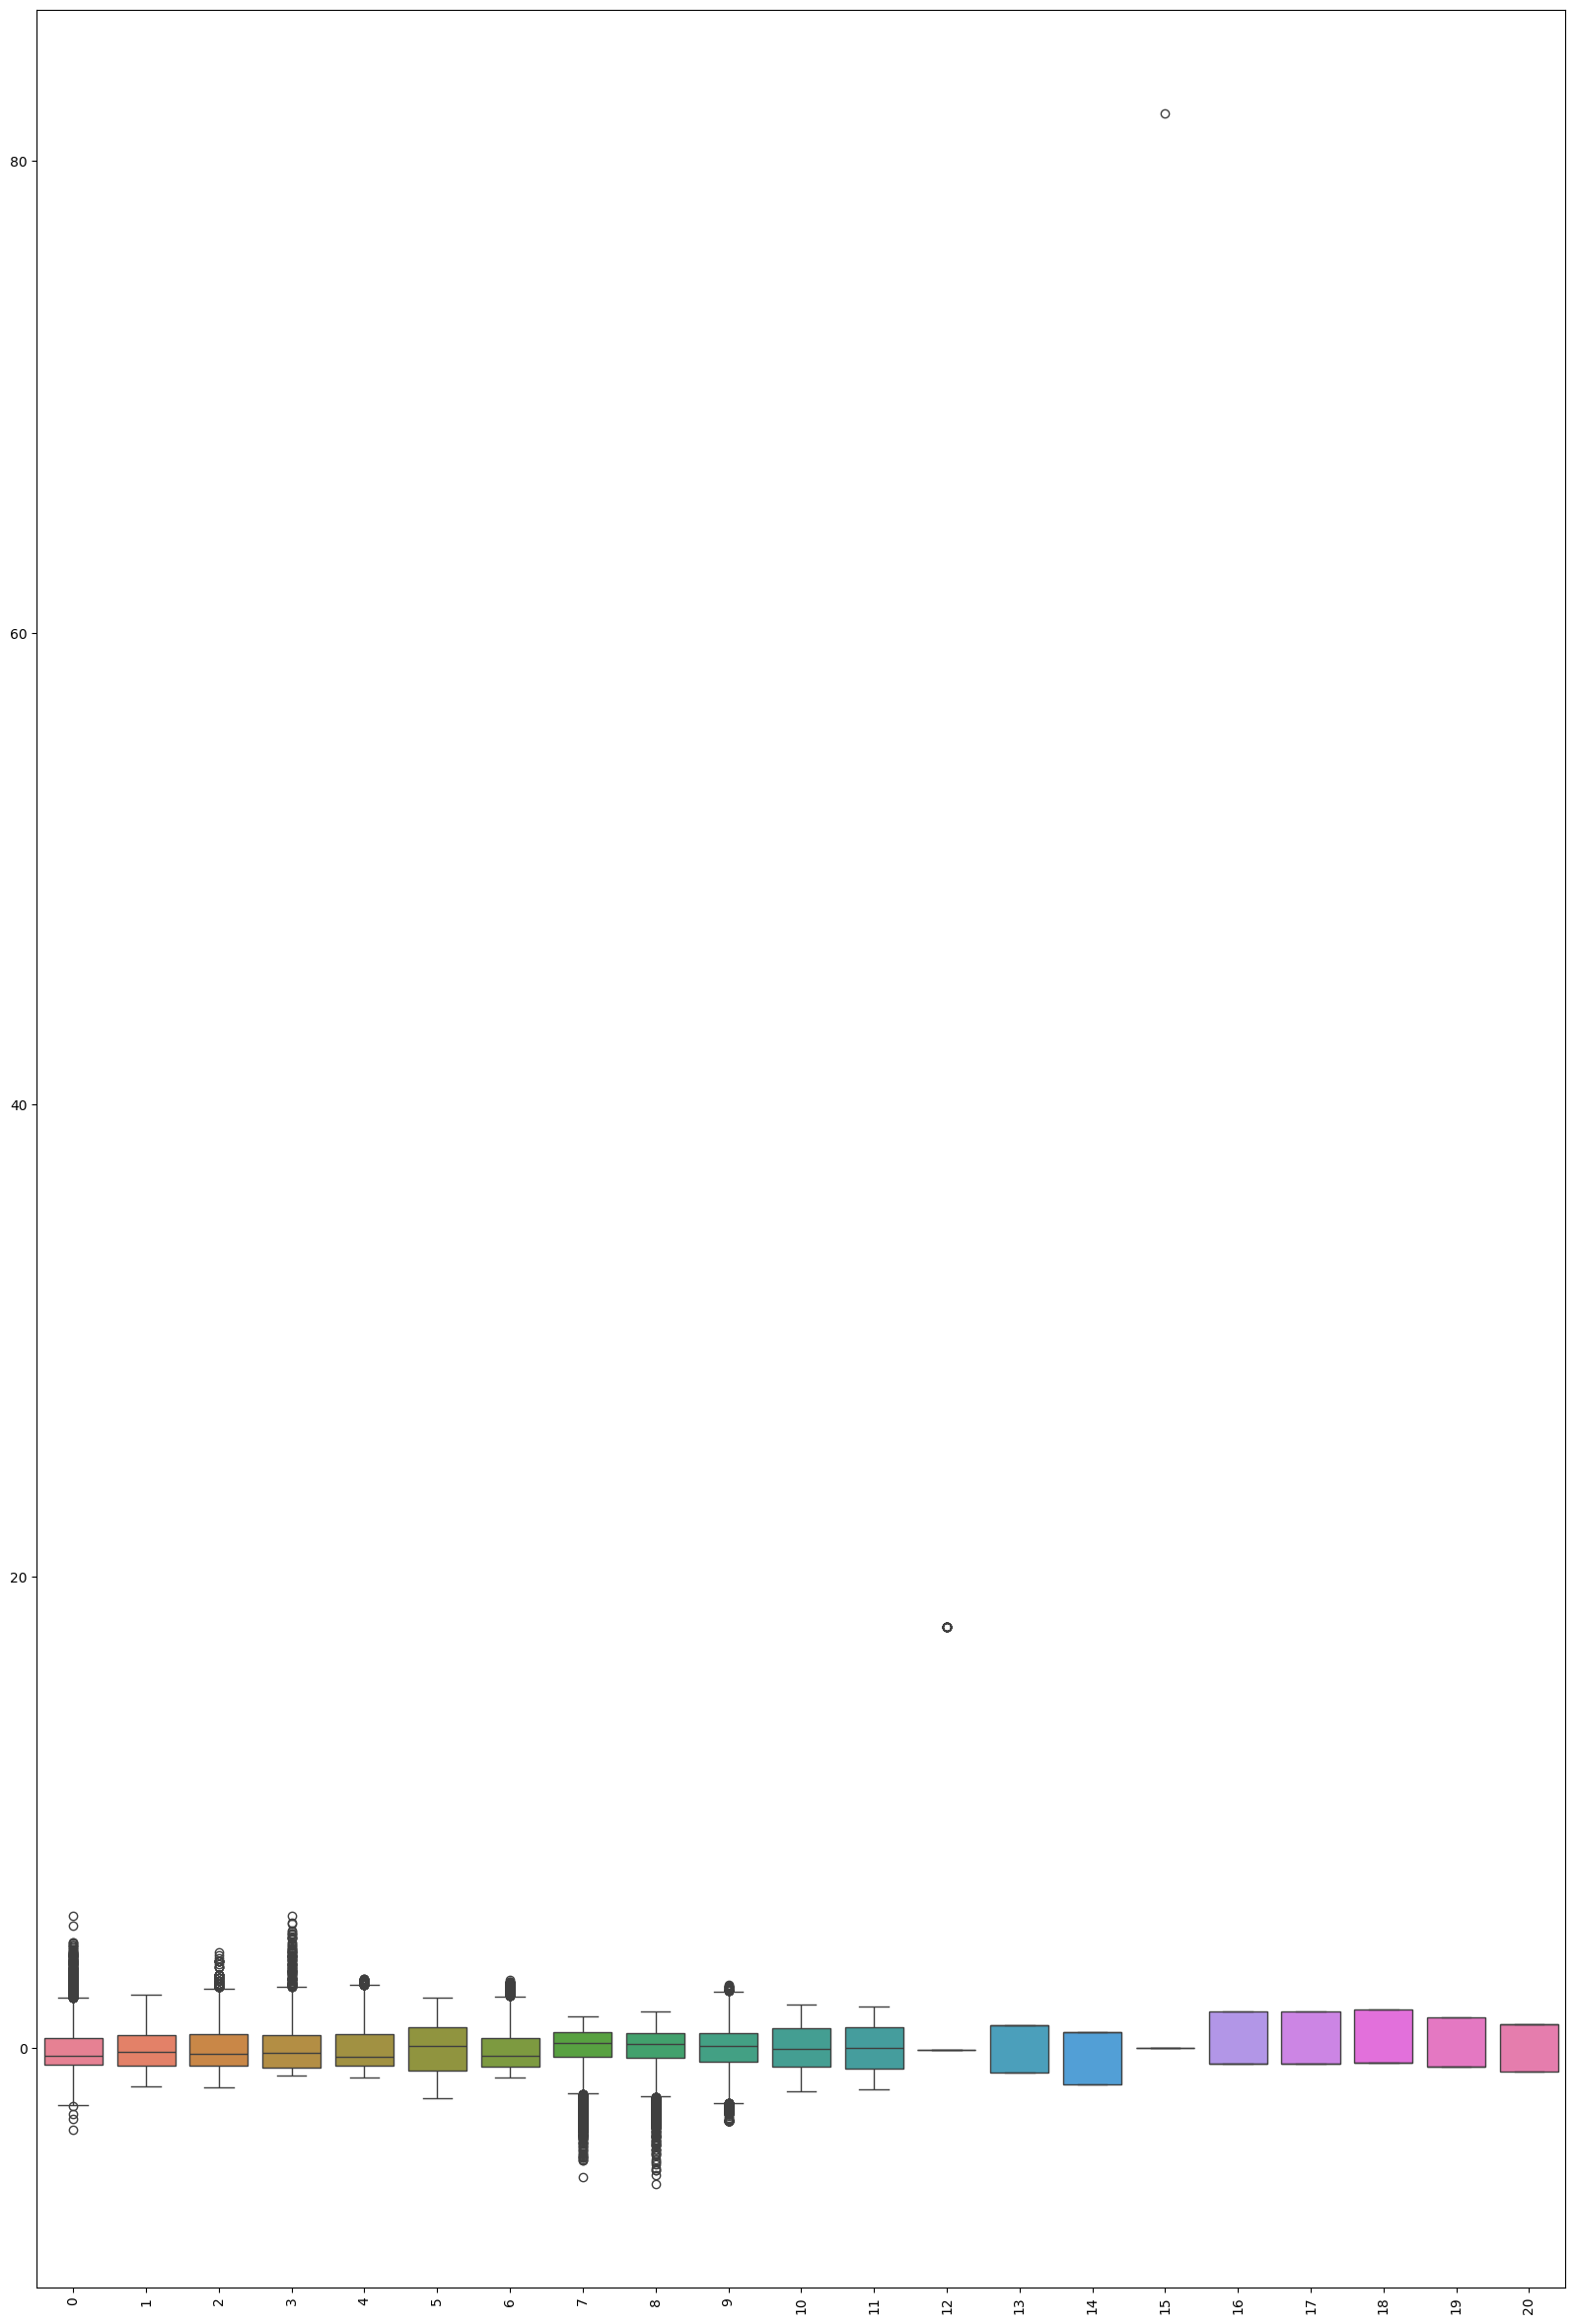

In [24]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [25]:
# count number of outleirs in each column
#convert numpy array to dataframe
X_train = pd.DataFrame(X_train)
for i in X_train:

    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = X_train[(X_train[i] < (Q1 - 1.5 * IQR)) | (X_train[i] > (Q3 + 1.5 * IQR))]

    # Count number of outliers
    number_of_outliers = len(outliers)

    print(f"Number of outliers in {i}: {number_of_outliers}")

Number of outliers in 0: 340
Number of outliers in 1: 0
Number of outliers in 2: 88
Number of outliers in 3: 114
Number of outliers in 4: 99
Number of outliers in 5: 0
Number of outliers in 6: 382
Number of outliers in 7: 390
Number of outliers in 8: 325
Number of outliers in 9: 164
Number of outliers in 10: 0
Number of outliers in 11: 0
Number of outliers in 12: 21
Number of outliers in 13: 0
Number of outliers in 14: 0
Number of outliers in 15: 1
Number of outliers in 16: 0
Number of outliers in 17: 0
Number of outliers in 18: 0
Number of outliers in 19: 0
Number of outliers in 20: 0


In [26]:
display(y_train_encoded.head())

,BMW,Ford,GMC,Honda,Mercedes,Toyota
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,True,False,False,False


In [27]:
def models(parameters,model,X_train,y_train_categorical,X_test,y_test_categorical):
    #grid search for the model
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
    grid_search.fit(X_train, y_train_categorical)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: ",best_accuracy)
    print("Parameters: ",best_parameters)
    best_model = grid_search.best_estimator_


    #predicting the test data
    y_pred = best_model.predict(X_test)

    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)
    print(cm)

    #accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test_categorical, y_pred)
    print("Test Accuracy",accuracy)

    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test_categorical, y_pred))


    #cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
    print("Mean Accuracies: ",accuracies.mean())
    print("std Accuracies: ",accuracies.std())

    return best_model


In [28]:
y_train_categorical = np.argmax(y_train_encoded.values, axis=1)
display(y_train_categorical)
display(y_test_encoded)
y_test_categorical = np.argmax(y_test_encoded.values, axis=1)


array([0, 4, 0, ..., 5, 5, 5], dtype=int64)

,BMW,Ford,GMC,Honda,Mercedes,Toyota
547,False,False,False,False,True,False
2422,False,False,False,False,True,False
4830,False,False,False,False,False,True
6036,False,False,False,False,False,True
2165,False,False,False,False,True,False
...,...,...,...,...,...,...
2378,False,False,False,False,False,True
4991,False,False,False,True,False,False
3008,False,False,True,False,False,False
945,False,False,False,False,False,True


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regresstion = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)


Best Accuracy:  0.8550240078306534
Parameters:  {'C': 0.5}
[[385  30   0  20   0  14]
 [  1  23   0   0   0   3]
 [  0   0  79   0   0  14]
 [ 16   0   0 270  91   0]
 [  0   0   0  63 466   0]
 [ 32  15  52   0   0 264]]
Test Accuracy 0.809031556039173
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       449
           1       0.34      0.85      0.48        27
           2       0.60      0.85      0.71        93
           3       0.76      0.72      0.74       377
           4       0.84      0.88      0.86       529
           5       0.89      0.73      0.80       363

    accuracy                           0.81      1838
   macro avg       0.72      0.81      0.74      1838
weighted avg       0.83      0.81      0.81      1838

Mean Accuracies:  0.8550240078306534
std Accuracies:  0.007061116909580584


In [30]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},model=SVC(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.8606681628387882
Parameters:  {'C': 10, 'kernel': 'linear'}
[[396  22   0  20   0  11]
 [  0  25   0   0   0   2]
 [  0   0  80   0   0  13]
 [ 16   0   0 272  89   0]
 [  0   0   0  58 471   0]
 [ 27  15  58   0   0 263]]
Test Accuracy 0.8199129488574538
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       449
           1       0.40      0.93      0.56        27
           2       0.58      0.86      0.69        93
           3       0.78      0.72      0.75       377
           4       0.84      0.89      0.87       529
           5       0.91      0.72      0.81       363

    accuracy                           0.82      1838
   macro avg       0.74      0.83      0.76      1838
weighted avg       0.84      0.82      0.82      1838

Mean Accuracies:  0.8606681628387882
std Accuracies:  0.00739898215900852


In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  nan
Parameters:  {'n_neighbors': 5}
[[396  12   5  14   0  22]
 [  1  23   1   0   0   2]
 [  3   0  87   0   0   3]
 [ 25   0   0 284  68   0]
 [  0   0   0  36 493   0]
 [ 47  21  44   3   0 248]]
Test Accuracy 0.8329706202393906
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       449
           1       0.41      0.85      0.55        27
           2       0.64      0.94      0.76        93
           3       0.84      0.75      0.80       377
           4       0.88      0.93      0.90       529
           5       0.90      0.68      0.78       363

    accuracy                           0.83      1838
   macro avg       0.75      0.84      0.77      1838
weighted avg       0.85      0.83      0.83      1838

Mean Accuracies:  nan
std Accuracies:  nan


In [32]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.930634124188165
Parameters:  {'criterion': 'entropy', 'max_depth': 30}
[[424   1   0  18   0   6]
 [  0  21   0   1   0   5]
 [  0   0  76   0   0  17]
 [ 12   0   0 311  54   0]
 [  0   0   0  32 497   0]
 [ 14   9  20   3   0 317]]
Test Accuracy 0.8955386289445049
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       449
           1       0.68      0.78      0.72        27
           2       0.79      0.82      0.80        93
           3       0.85      0.82      0.84       377
           4       0.90      0.94      0.92       529
           5       0.92      0.87      0.90       363

    accuracy                           0.90      1838
   macro avg       0.85      0.86      0.85      1838
weighted avg       0.90      0.90      0.90      1838

Mean Accuracies:  0.9297430346427044
std Accuracies:  0.011438010045366959


In [248]:
# !pip install lazypredict

In [34]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_df, predictions = clf.fit(X_train, X_test, y_train_categorical, y_test_categorical)
display(models_df)



 97%|█████████▋| 28/29 [00:12<00:00,  2.67it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 6732, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:13<00:00,  2.14it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.93,None,0.94,0.61
XGBClassifier,0.94,0.93,None,0.94,0.48
ExtraTreesClassifier,0.93,0.92,None,0.93,0.58
RandomForestClassifier,0.94,0.92,None,0.94,1.79
BaggingClassifier,0.92,0.91,None,0.92,0.87
SVC,0.88,0.88,None,0.88,0.56
DecisionTreeClassifier,0.91,0.88,None,0.91,0.12
KNeighborsClassifier,0.83,0.84,None,0.83,0.08
ExtraTreeClassifier,0.85,0.84,None,0.85,0.01


## After Deletting Outliers

In [28]:

#delete outliers
print(X_train.shape, y_train_categorical.shape)
X_train_no = X_train[(X_train < 3).all(axis=1)]
y_train_no = y_train_categorical[(X_train < 3).all(axis=1)]


print(X_train_no.shape, y_train_no.shape)
print(X_train_no.shape, y_train_no.shape)

(6732, 21) (6732,)
(6488, 21) (6488,)
(6488, 21) (6488,)


In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

print(type(X_train_no),type(y_train_no),type(X_test),type(y_test_categorical))
logistic_regresstion_no = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
                            model=LogisticRegression(),
                            X_train=X_train_no,
                            y_train_categorical=y_train_no,
                            X_test=X_test,
                            y_test_categorical=y_test_categorical)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Best Accuracy:  0.8552961346040441
Parameters:  {'C': 1}
[[384  30   0  20   0  15]
 [  2  23   0   0   0   2]
 [  0   0  81   0   0  12]
 [ 17   0   0 272  88   0]
 [  0   0   0  69 460   0]
 [ 30  15  59   0   0 259]]
Test Accuracy 0.8046789989118607
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       449
           1       0.34      0.85      0.48        27
           2       0.58      0.87      0.70        93
           3       0.75      0.72      0.74       377
           4       0.84      0.87      0.85       529
           5       0.90      0.71      0.80       363

    accuracy                           0.80      1838
   macro avg       0.72      0.81      0.74      1838
weighted avg       0.82      0.80      0.81      1838

Mean Accuracies:  0.8552961346040441
std Accuracies:  0.013554044303977691


In [37]:
#SVM
from sklearn.svm import SVC
svm_no = models(parameters={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf']},model=SVC(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9369064943217484
Parameters:  {'C': 10, 'kernel': 'rbf'}
[[428   3   0   9   0   9]
 [  1  20   0   0   0   6]
 [  0   0  79   0   0  14]
 [ 10   0   0 320  47   0]
 [  0   0   0  22 507   0]
 [ 20   3  18   0   0 322]]
Test Accuracy 0.911860718171926
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       449
           1       0.77      0.74      0.75        27
           2       0.81      0.85      0.83        93
           3       0.91      0.85      0.88       377
           4       0.92      0.96      0.94       529
           5       0.92      0.89      0.90       363

    accuracy                           0.91      1838
   macro avg       0.88      0.87      0.87      1838
weighted avg       0.91      0.91      0.91      1838

Mean Accuracies:  0.9369064943217484
std Accuracies:  0.010002102021544931


In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_no = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  nan
Parameters:  {'n_neighbors': 5}
[[390  12   5  16   0  26]
 [  1  23   1   0   0   2]
 [  4   0  86   0   0   3]
 [ 25   0   0 283  69   0]
 [  0   0   0  34 495   0]
 [ 47  21  45   3   0 247]]
Test Accuracy 0.8291621327529923
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       449
           1       0.41      0.85      0.55        27
           2       0.63      0.92      0.75        93
           3       0.84      0.75      0.79       377
           4       0.88      0.94      0.91       529
           5       0.89      0.68      0.77       363

    accuracy                           0.83      1838
   macro avg       0.75      0.84      0.77      1838
weighted avg       0.84      0.83      0.83      1838

Mean Accuracies:  nan
std Accuracies:  nan


In [39]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_no = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9328972398181437
Parameters:  {'criterion': 'entropy', 'max_depth': 30}
[[419   1   0  18   0  11]
 [  0  20   0   1   0   6]
 [  0   0  81   0   0  12]
 [ 17   0   0 309  51   0]
 [  0   0   0  34 495   0]
 [ 17   8  23   5   0 310]]
Test Accuracy 0.8890097932535365
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       449
           1       0.69      0.74      0.71        27
           2       0.78      0.87      0.82        93
           3       0.84      0.82      0.83       377
           4       0.91      0.94      0.92       529
           5       0.91      0.85      0.88       363

    accuracy                           0.89      1838
   macro avg       0.84      0.86      0.85      1838
weighted avg       0.89      0.89      0.89      1838

Mean Accuracies:  0.9325885978428351
std Accuracies:  0.01561015984738612


In [40]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_df,predictions = clf.fit(X_train_no, X_test, y_train_no, y_test_categorical)
models_df

 97%|█████████▋| 28/29 [00:12<00:00,  2.81it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 6482, number of used features: 19
[LightGBM] [Info] Start training from score -1.814541
[LightGBM] [Info] Start training from score -1.753916
[LightGBM] [Info] Start training from score -1.770089
[LightGBM] [Info] Start training from score -1.800436
[LightGBM] [Info] Start training from score -1.781934
[LightGBM] [Info] Start training from score -1.831733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:12<00:00,  2.28it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.94,0.94,None,0.94,0.44
LGBMClassifier,0.94,0.93,None,0.94,0.63
ExtraTreesClassifier,0.94,0.93,None,0.94,0.54
RandomForestClassifier,0.93,0.91,None,0.93,1.72
BaggingClassifier,0.91,0.90,None,0.91,0.82
SVC,0.88,0.88,None,0.89,0.54
DecisionTreeClassifier,0.89,0.86,None,0.89,0.10
LabelSpreading,0.85,0.83,None,0.85,2.47
LabelPropagation,0.85,0.83,None,0.85,1.79


## NN Model

In [29]:
# NN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score

#split data into train and validation
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train_encoded, test_size=0.3, random_state=777)

# define model
model = Sequential()
model.add(Dense(64, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# compile model
# model.compile(loss='ca', optimizer=Adam(learning_rate=0.001), metrics=[AUC()])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[AUC()])
model.summary()

# fit model

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X_train_nn, y=y_train_nn, epochs=100, batch_size=128, validation_data=(X_val_nn, y_val_nn), callbacks=[early_stop])





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)               

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


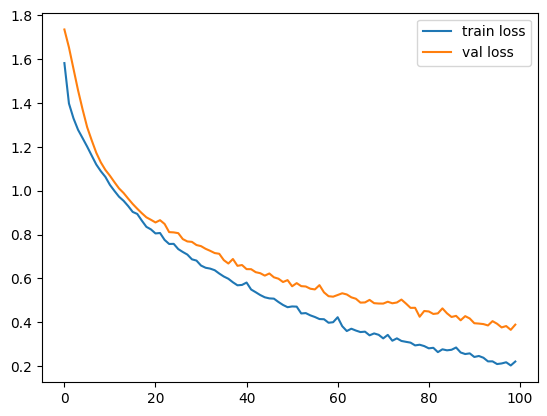

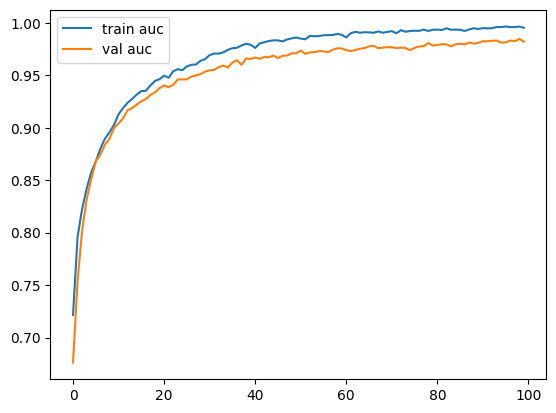

58/58 [==============================] - 0s 826us/step
Test Accuracy 0.8743199129488575
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       449
           1       0.70      0.78      0.74        27
           2       0.79      0.90      0.84        93
           3       0.86      0.82      0.84       377
           4       0.90      0.94      0.92       529
           5       0.83      0.86      0.84       363

    accuracy                           0.87      1838
   macro avg       0.83      0.86      0.85      1838
weighted avg       0.88      0.87      0.87      1838



In [42]:
print(history.history.keys())
#  plot loss per iteration
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot auc per iteration
plt.plot(history.history['auc'], label='train auc')
plt.plot(history.history['val_auc'], label='val auc')
plt.legend()
plt.show()

# predict probabilities for test set
y_pred = model.predict(X_test)
y_pred_categorical = np.argmax(y_pred, axis=1)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)
print("Test Accuracy",accuracy)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred_categorical))

In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
}

#grid search for the model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                        scoring='f1_macro',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best F1 Macro Score:",best_accuracy)
print("Parameters:",best_parameters)
best_model = grid_search.best_estimator_

#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))

Best F1 Macro Score: 0.9637213549294993
Parameters: {'criterion': 'entropy', 'n_estimators': 200}
[[436   2   0   9   0   2]
 [  1  23   0   0   0   3]
 [  0   0  87   0   0   6]
 [ 12   0   0 331  34   0]
 [  0   0   0  15 514   0]
 [ 18   6   8   1   0 330]]
Test F1 Macro Score: 0.9109569113906731
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       449
           1       0.74      0.85      0.79        27
           2       0.92      0.94      0.93        93
           3       0.93      0.88      0.90       377
           4       0.94      0.97      0.95       529
           5       0.97      0.91      0.94       363

    accuracy                           0.94      1838
   macro avg       0.90      0.92      0.91      1838
weighted avg       0.94      0.94      0.94      1838



In [44]:
# Error Analysis
# write the incorrect labels in an array
incorrect_labels = []
for i in range(len(y_pred)):
    if y_pred[i] != y_test_categorical[i]:
        incorrect_labels.append(i)

# print the number of incorrect labels
print(len(incorrect_labels))



112


In [45]:
# XGBClassifier Classifier
from xgboost import XGBClassifier
parameters={
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300, 500],
    'objective': ['multi:softmax', 'multi:softprob'],
    'random_state': [777],
}


#grid search for the model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(),
                        param_grid=parameters,
                        scoring='f1_macro',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best F1 Macro Score:",best_accuracy)
print("Parameters:",best_parameters)
best_model = grid_search.best_estimator_

#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))

Best F1 Macro Score: 0.9652763021788285
Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'objective': 'multi:softmax', 'random_state': 777}
[[436   1   0  12   0   0]
 [  1  24   0   0   0   2]
 [  0   0  89   0   0   4]
 [ 11   0   0 334  32   0]
 [  0   0   0   9 520   0]
 [ 21   4  11   0   0 327]]
Test F1 Macro Score: 0.9239348918772459
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       449
           1       0.83      0.89      0.86        27
           2       0.89      0.96      0.92        93
           3       0.94      0.89      0.91       377
           4       0.94      0.98      0.96       529
           5       0.98      0.90      0.94       363

    accuracy                           0.94      1838
   macro avg       0.92      0.93      0.92      1838
weighted avg       0.94      0.94      0.94      1838



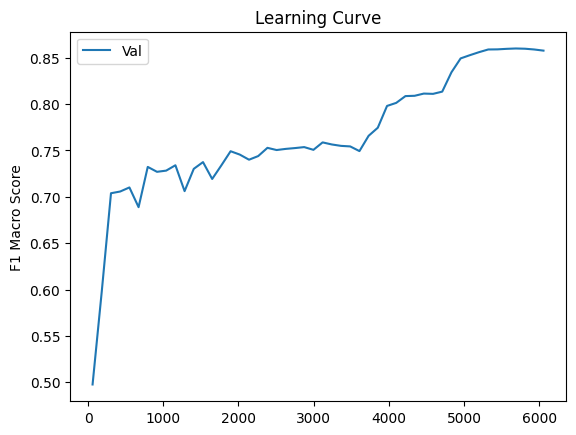

In [46]:
from sklearn.model_selection import learning_curve



# plot learning curve for all models
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train_categorical, cv=10, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Learning Curve")
plt.ylabel("F1 Macro Score")
plt.plot(train_sizes, test_scores_mean, label='Val')
plt.legend()
plt.show()




## Best Models

In [38]:
# best models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#SVM
#Parameters:  {'C': 10, 'kernel': 'rbf'}
svm = SVC(C=10, kernel='rbf')
svm.fit(X_train, y_train_categorical)
svm_y_pred = svm.predict(X_test)

#Random Forest
#Parameters: {'criterion': 'entropy', 'n_estimators': 200}
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=200)
random_forest.fit(X_train, y_train_categorical)
rf_y_pred = random_forest.predict(X_test)

#XGBClassifier
#Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'objective': 'multi:softmax', 'random_state': 777}
xgb = XGBClassifier(colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, objective='multi:softmax', random_state=777)
xgb.fit(X_train, y_train_categorical)
xgb_y_pred = xgb.predict(X_test)

#Logistic Regression
#Parameters:  {'C': 0.5}
logistic_regression = LogisticRegression(C=0.5)
logistic_regression.fit(X_train, y_train_categorical)
lg_y_pred = logistic_regression.predict(X_test)

#KNN
#Parameters:  {'n_neighbors': 5}
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train_categorical)
knn_y_pred = knn.predict(X_test)

#Decision Tree
#Parameters:  {'criterion': 'entropy', 'max_depth': 30}
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30)
decision_tree.fit(X_train, y_train_categorical)
dt_y_pred = decision_tree.predict(X_test)


#CNN
cnn_y_pred = model.predict(X_test)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)


# display misclassified data


58/58 [==============================] - 1s 4ms/step
SVM
Actual: 3 Predicted: 4
[-0.89719145 -1.19418546  1.54008489 -1.00130514 -0.91680438 -1.56748968
 -0.89587248 -0.3159991  -2.54385785 -1.27821258  1.46058628  1.48331687
 -0.05593917  0.97187485 -1.52299922 -0.01218878  1.55030249 -0.64549722
 -0.60320591 -0.76810535  0.99970296]

Actual: 3 Predicted: 4
[-0.54444548 -0.41650279  1.54008489 -1.00130514 -1.0218563  -1.70508291
 -0.87940412  1.33921188 -1.13296708 -1.92925196 -1.05177743  0.76688699
 -0.05593917  0.97187485 -1.52299922 -0.01218878 -0.64503541  1.54919334
 -0.60320591  1.30190474 -1.00029713]

Actual: 5 Predicted: 0
[ 0.23943445  1.51690275 -0.37075362  0.12922403  0.27398643  0.28876817
  0.08490945 -1.0716389   0.7952503   1.34919637 -0.5714726  -1.68969486
 -0.05593917 -1.02893906  0.65659915 -0.01218878 -0.64503541 -0.64549722
 -0.60320591 -0.76810535  0.99970296]

Actual: 5 Predicted: 1
[-0.27008751 -0.77294068 -0.60960844  0.83279804  1.9712125   0.59647668
  2.

## Error Analysis

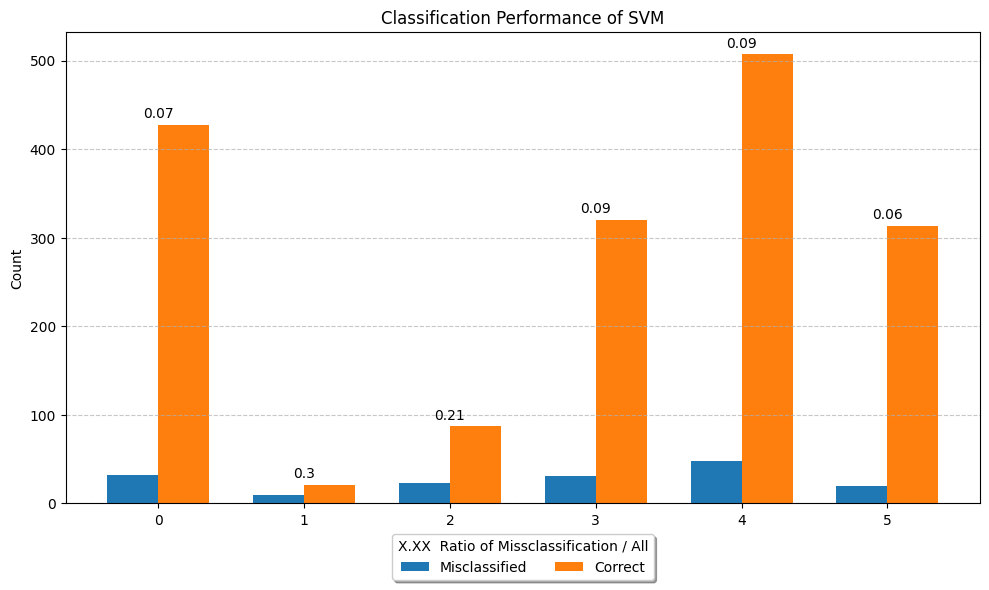

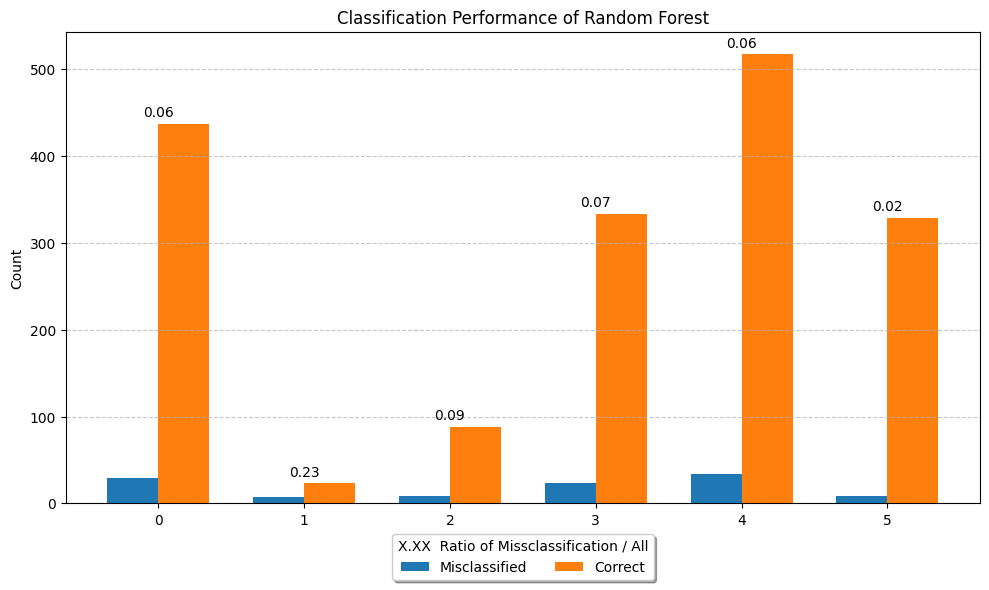

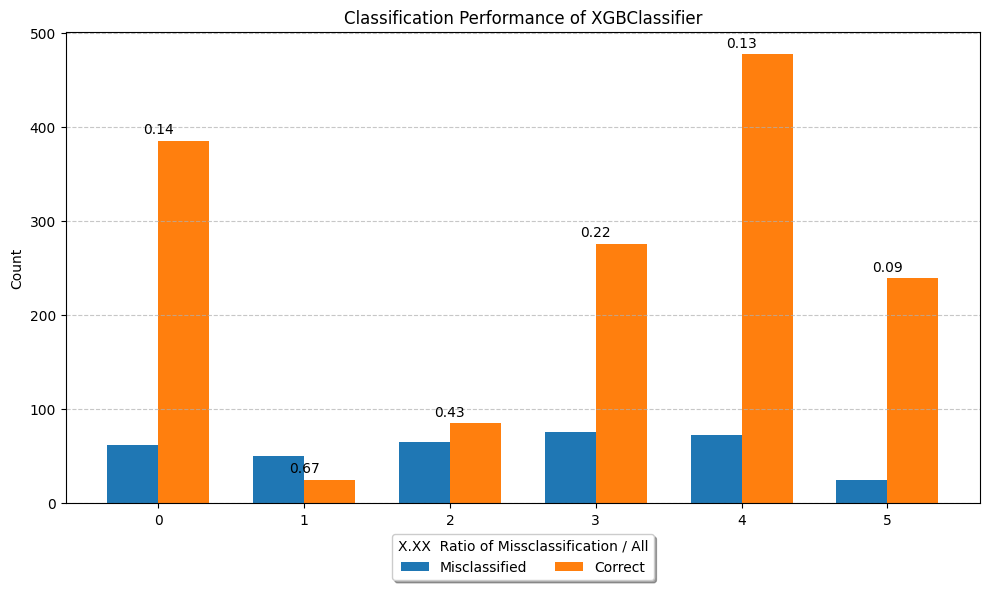

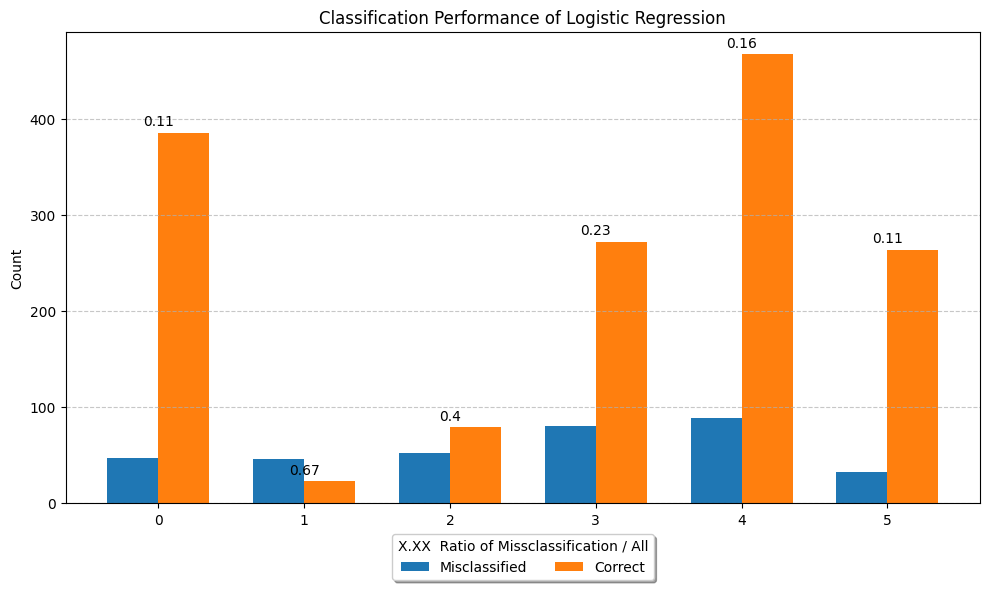

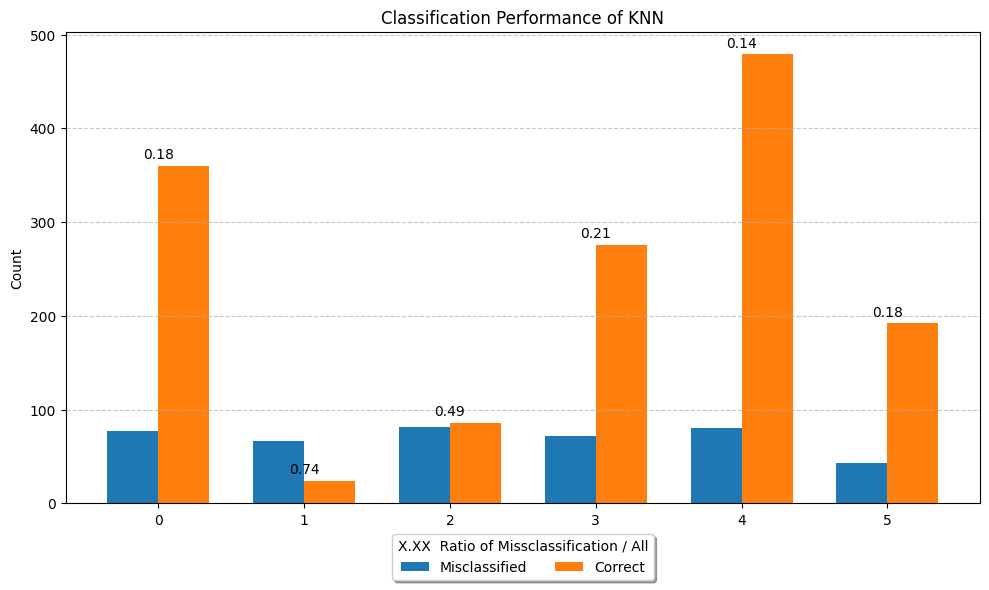

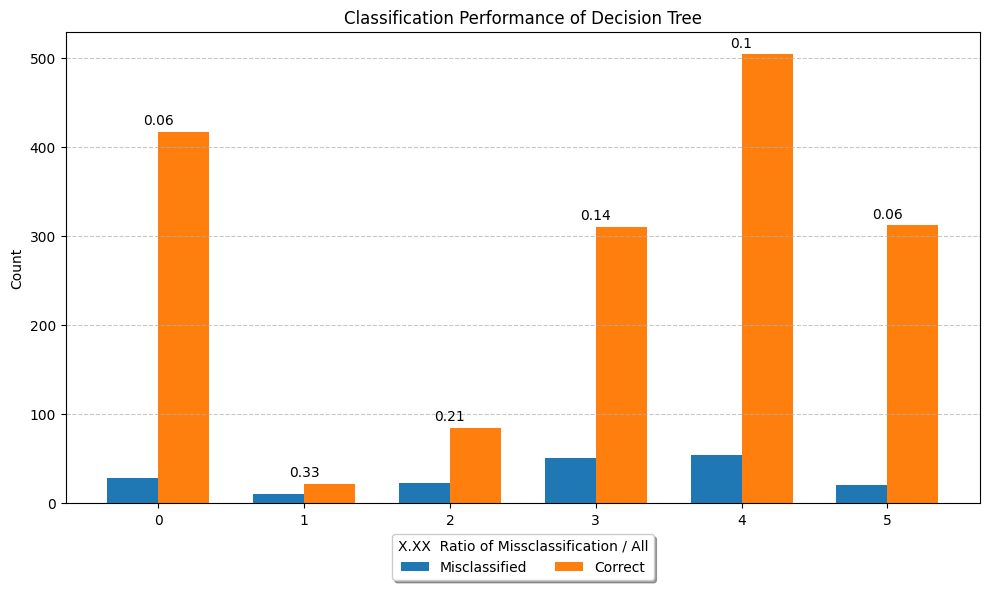

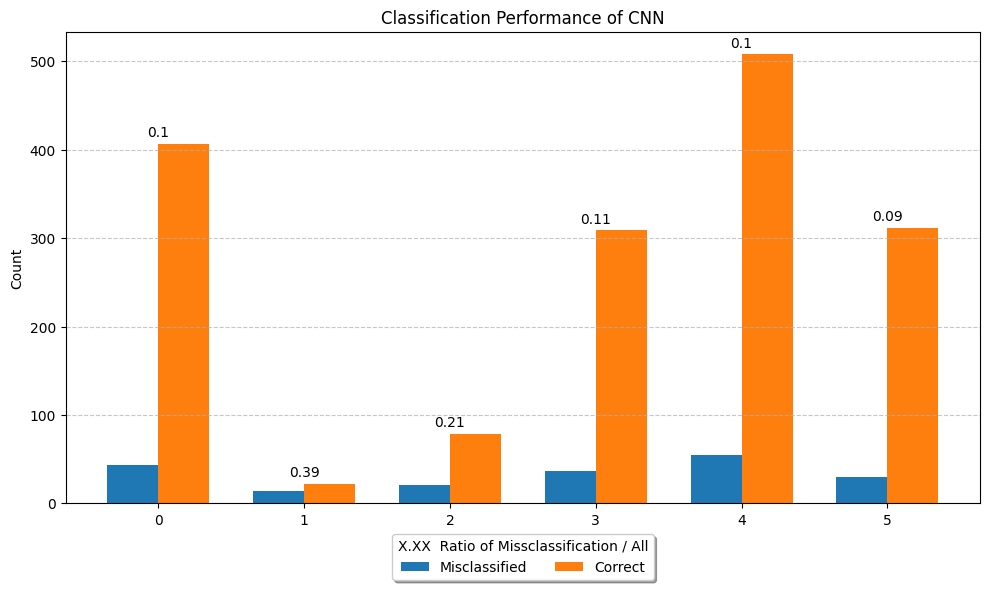

In [165]:
all_y_pred = [svm_y_pred, rf_y_pred, xgb_y_pred, lg_y_pred, knn_y_pred, dt_y_pred, cnn_y_pred]
name = ['SVM', 'Random Forest', 'XGBClassifier', 'Logistic Regression', 'KNN', 'Decision Tree', 'CNN']

def get_missclassified_classes(y_test_categorical, y_pred):
    incorrect_list = []
    correct_list = []
    for i in range(len(y_test_categorical)):
        if y_test_categorical[i] != y_pred[i]:            
            incorrect_list.append(y_test_categorical[i])
        else:
            correct_list.append(X_test[i])

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)

    # Calculate total counts for each prediction
    correct_counts = cm.diagonal()
    misclassified_counts = cm.sum(axis=0) - correct_counts
    miss_class = misclassified_counts / cm.sum(axis=1)

    labels = ['0', '1', '2', '3', '4', '5']
    for i in labels:
        i = "Class"+str(i)+"Missclassified"+str(miss_class[int(i)])
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, misclassified_counts, width, label='Misclassified')
    rects2 = ax.bar(x + width/2, correct_counts, width, label='Correct')

    # Add some text for labels, title and custom x-axis tick labels, etc.

    PerformanceName = 'Classification Performance of '+ str(Name[j])
    ax.set_ylabel('Count')
    ax.set_title(PerformanceName)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    class_ratios = [str(round(rects1/(rects1+rects2),2)) for rects1, rects2 in zip(misclassified_counts, correct_counts)]

    # set a label at the tob of each class bars with the class ratio of missclassified to correct labels 
    for i in range(len(labels)):
        plt.annotate(class_ratios[i],   
                    xy=(x[i], correct_counts[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.legend(title="X.XX  Ratio of Missclassification / All",loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)



    plt.grid(axis="y", linestyle="--", alpha=0.7)
    fig.tight_layout()
    plt.show()

for j in range(len(all_y_pred)):
    y_pred = all_y_pred[j]
    get_missclassified_classes(y_test_categorical, y_pred)

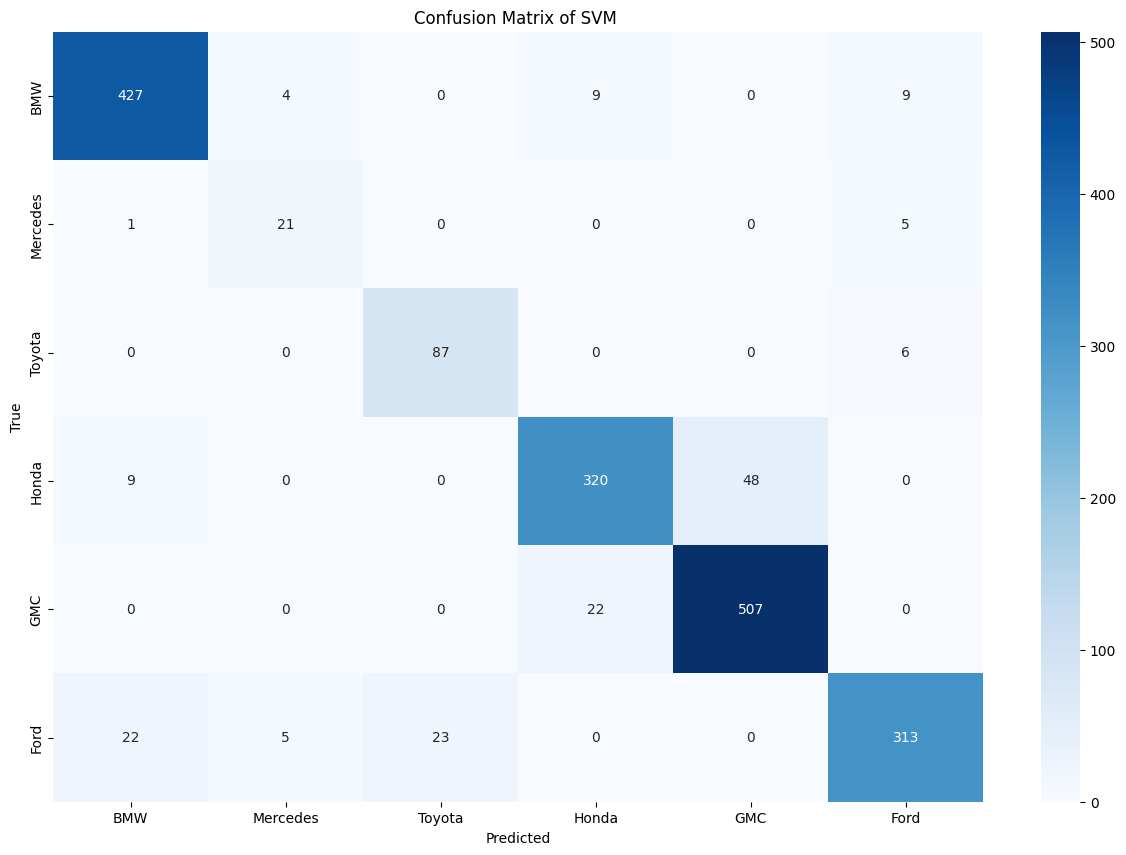

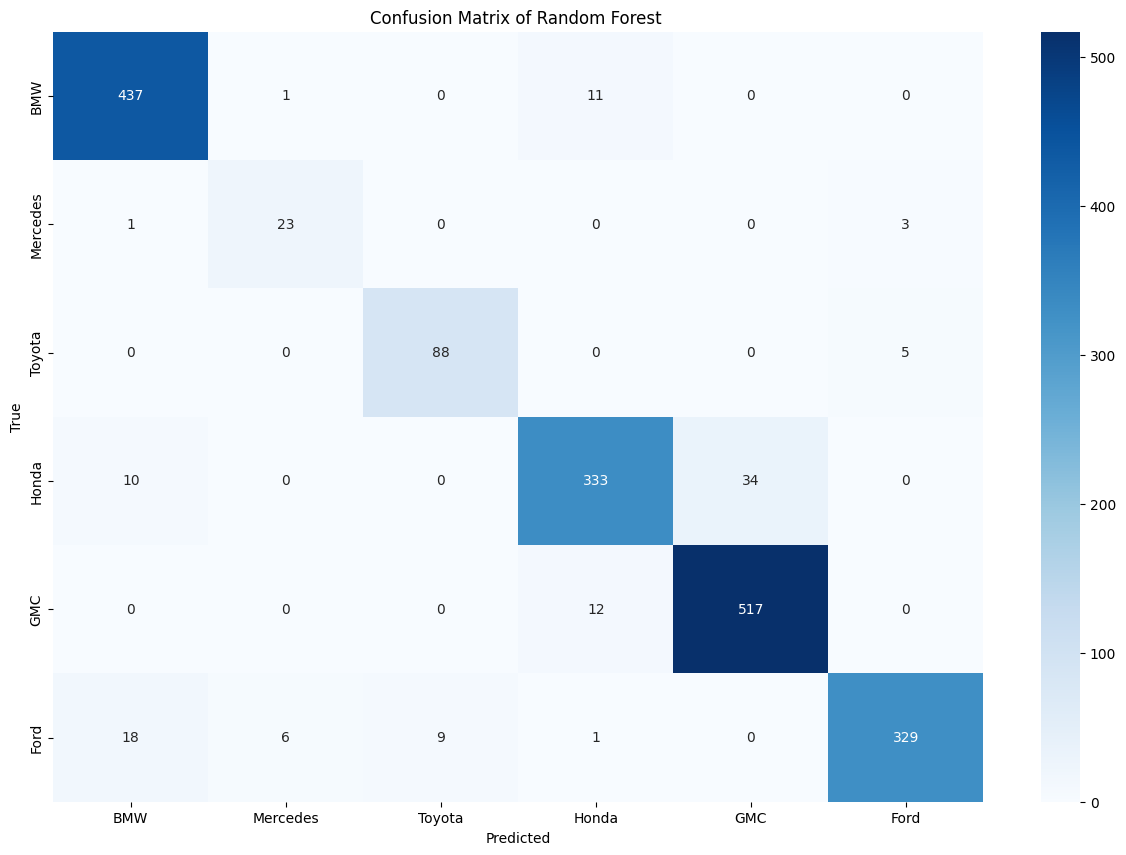

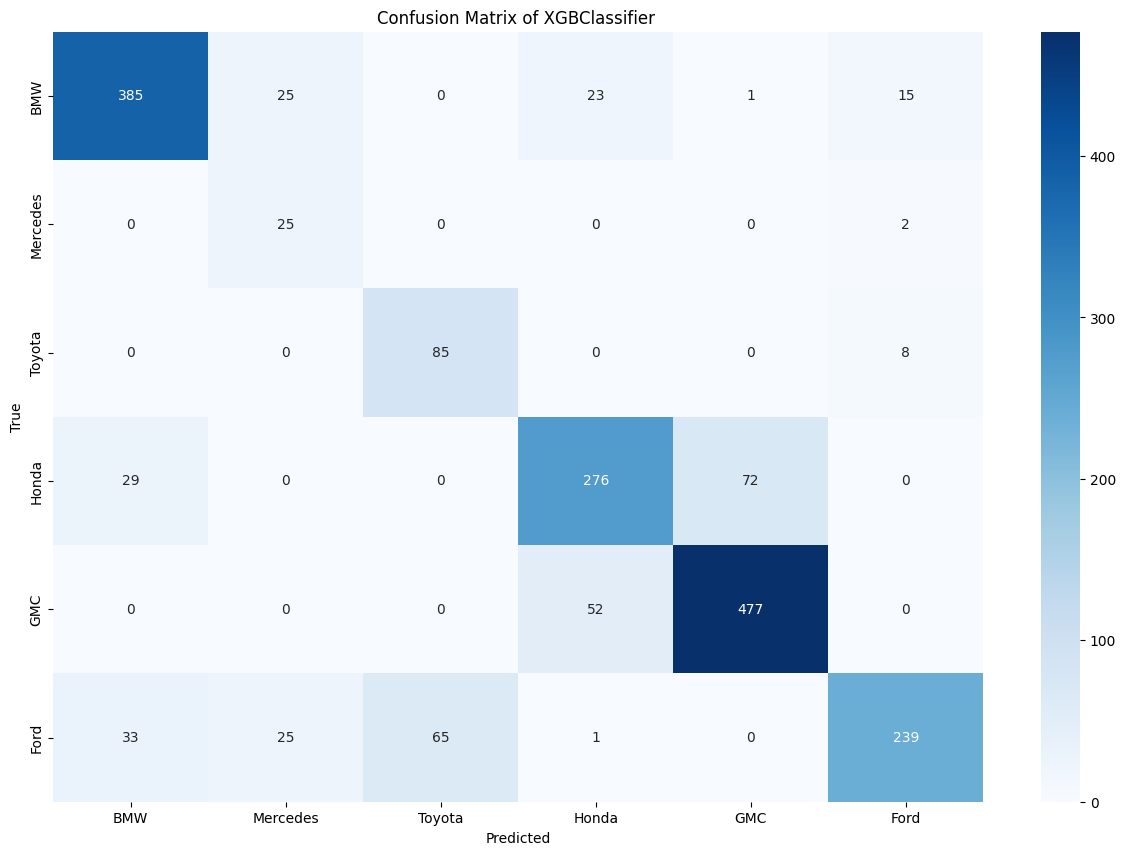

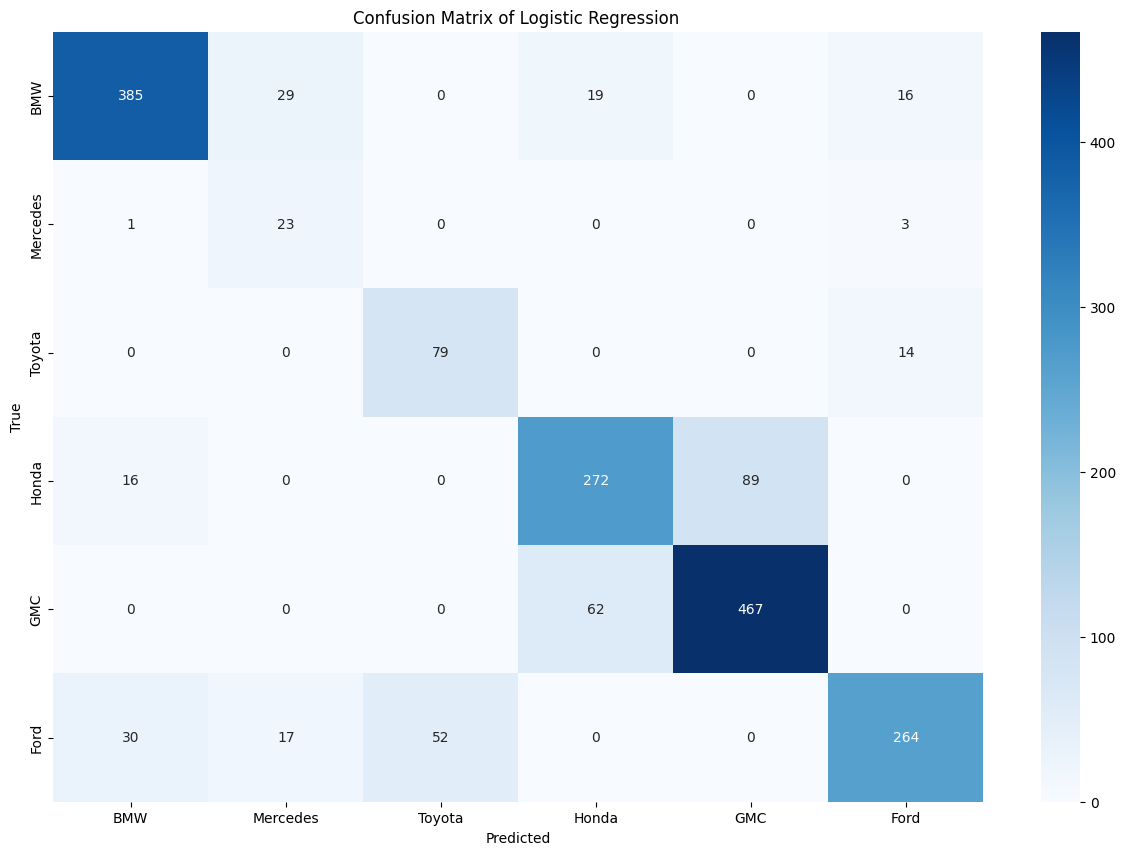

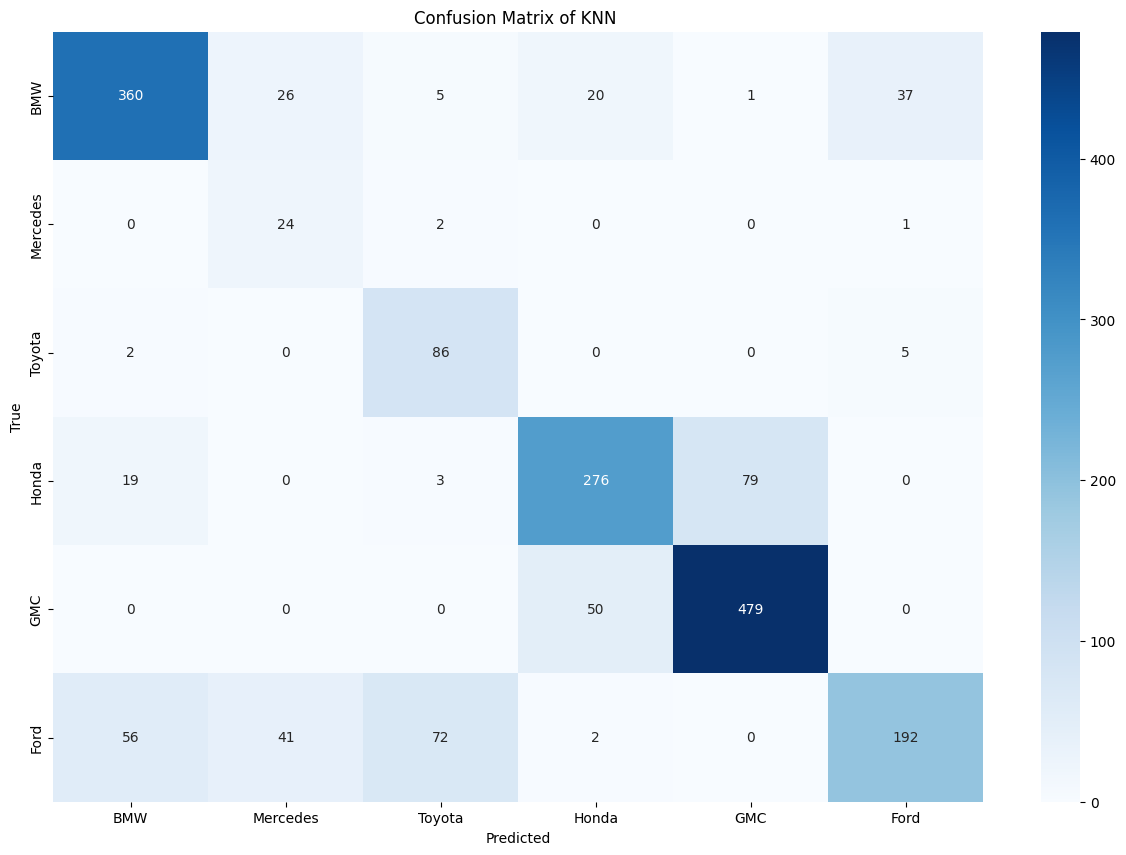

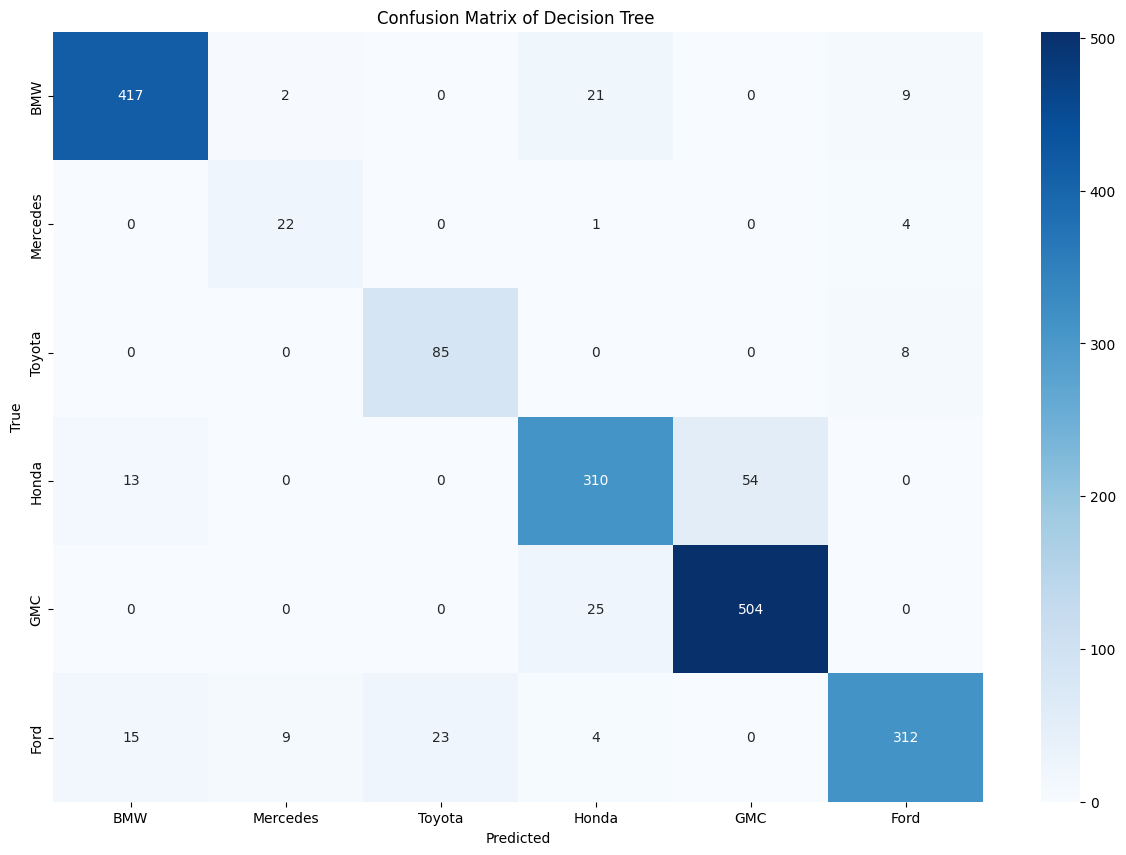

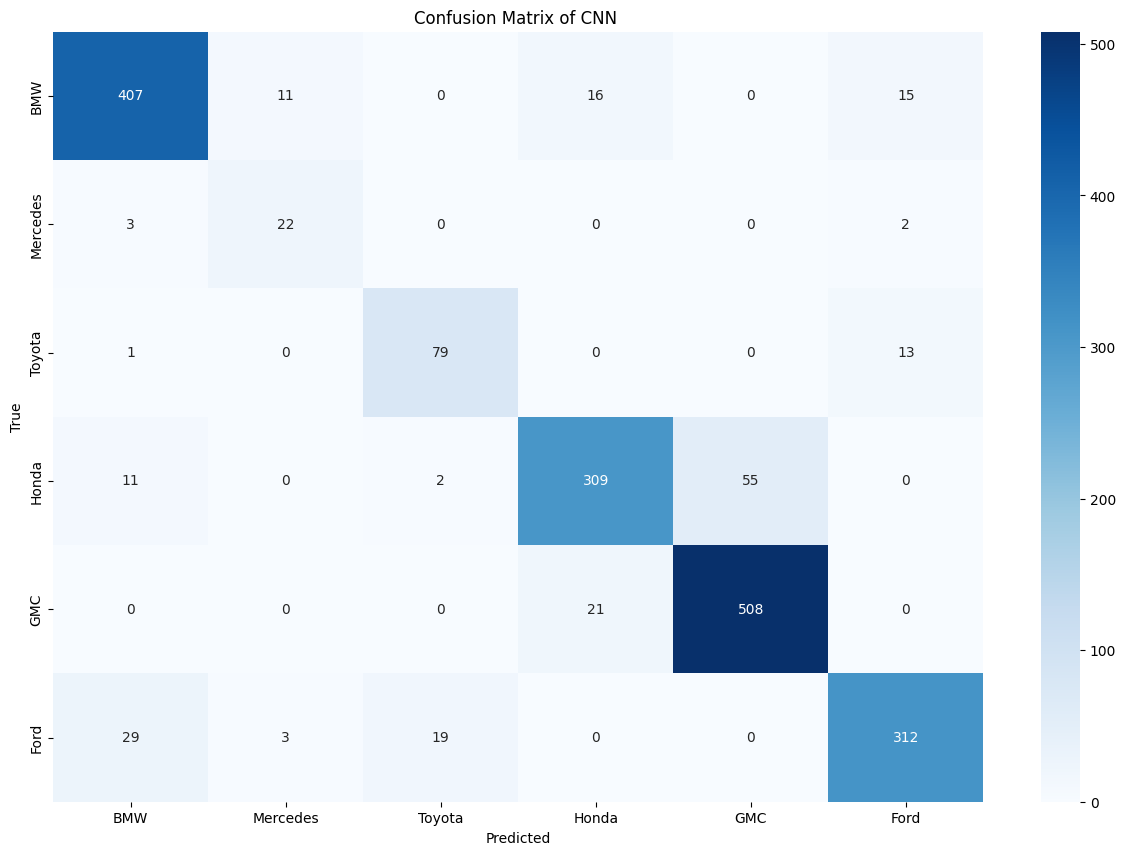

In [251]:
all_y_pred = [svm_y_pred, rf_y_pred, xgb_y_pred, lg_y_pred, knn_y_pred, dt_y_pred, cnn_y_pred]
name = ['SVM', 'Random Forest', 'XGBClassifier', 'Logistic Regression', 'KNN', 'Decision Tree', 'CNN']

def get_cm(y_test_categorical, y_pred,name):
    incorrect_list = []
    correct_list = []
    for i in range(len(y_test_categorical)):
        if y_test_categorical[i] != y_pred[i]:            
            incorrect_list.append(y_test_categorical[i])
        else:
            correct_list.append(X_test[i])

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)

    cm = cm.astype('float')
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix of {name} ")


for j in range(len(all_y_pred)):
    y_pred = all_y_pred[j]
    get_cm(y_test_categorical, y_pred,name[j])

Class Honda has a high number of correctly classified instances for all models but also some misclassified cases, specificly with class GMC .
features might be similar between Honda and GMC, leading the model to confuse them.

In [228]:
# !pip install lime

In [229]:
# !pip install shap

In [220]:
# # XAI libraries
# import lime
# import shap

# shap_explainer = shap.Explainer(xgb, X_train,)
# shap_values = shap_explainer(X_test)


100%|===================| 11011/11028 [01:58<00:00]        

In [ ]:
# shap.summary_plot(shap_values, X_test,max_display=10)

In [194]:
# from sklearn.metrics import recall_score
# from sklearn.metrics import confusion_matrix
# # Install additional library (e.g., pip install scikit-learn-contrib)
# class_names = ['BMW', 'Mercedes', 'Toyota', 'Honda', 'GMC','Ford']
# def pairwise_confusion_matrix(y_true, y_pred):
#     cm = np.ones((len(class_names), len(class_names)), dtype=np.int32)

#     recall = recall_score(y_true, y_pred, average=None)[:, None] 
#     print(recall)
#     return cm


# from sklearn.metrics import recall_score
# from sklearn.metrics import confusion_matrix

# for j in range(len(all_y_pred)):
#     y_pred = all_y_pred[j]
#     y_true = y_test_categorical

#     cm = pairwise_confusion_matrix(y_test_categorical, y_pred)
#     plt.figure(figsize=(10, 20))
#     sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title(name[j])
        

#     plt.show()



# Active Learning

In [31]:
X = X_train
y = y_train_categorical
print(X.shape, y.shape)
# split data into labeled and unlabeled
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, train_size=100, random_state=777)
print(x_labeled.shape, x_unlabeled.shape, y_labeled.shape, y_unlabeled.shape)
# hyperparameters for the model
# parameters = best_parameters

parameters = {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'objective': 'multi:softmax', 'random_state': 777}


(6732, 21) (6732,)
(100, 21) (6632, 21) (100,) (6632,)


In [32]:
class EarlyStop:
    # if current - prev < threshold, stop
    def __init__(self, patience, threshold=0.0001):
        self.patience = patience
        self.wait = 0
        self.threshold = threshold
        self.prev_loss = None

    def __call__(self, loss):
        if self.prev_loss is None:
            self.prev_loss = loss
            return False
        else:
            if abs(loss - self.prev_loss) < self.threshold:
                if self.wait >= self.patience:
                    return True
                self.wait += 1
            else:
                self.prev_loss = loss
                self.wait = 0
                return False

In [73]:
# initialize active learneing loop
def active_learning(model, x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy = 'entropy'):
    # initialize the model
    early_stop = EarlyStop(patience=20, threshold=0.0001)
    model.fit(x_labeled, y_labeled)
    y_pred = model.predict(x_unlabeled)
    print(y_pred.shape, y_unlabeled.shape)
    macro_f1 = []
    added_labels = 0
    macro_f1.append(f1_score(y_unlabeled, y_pred, average='macro'))
    print("Initial macro f1 score: ", macro_f1[-1])
    while not early_stop(macro_f1[-1]):
        if query_strategy == 'entropy':
            query_idx, selected_idx = entropy_sampling(model, x_unlabeled)
        elif query_strategy == 'least_confidence':
            query_idx, selected_idx = lease_confidence(model, x_unlabeled)
        else:
            print("Invalid query strategy")
            break

        # add new labeled data to train data
        x_labeled = np.vstack((x_labeled, x_unlabeled.loc[query_idx]))
        y_labeled = np.concatenate((y_labeled, y_unlabeled[selected_idx]))

        # remove labeled data from unlabeled data
        x_unlabeled = x_unlabeled.drop(query_idx)
        y_unlabeled = np.delete(y_unlabeled, selected_idx)

        # train model on new labeled data
        model.fit(x_labeled, y_labeled)
        y_pred = model.predict(x_unlabeled)
        macro_f1.append(f1_score(y_unlabeled, y_pred, average='macro'))
        added_labels += 1
        print("Added labels: {}, Macro f1 score: {}".format(added_labels, macro_f1[-1]))
    return model, macro_f1

## Uncertainty Sampling 

### Least Confidence Sampling

In [119]:
# get least confident instances from unlabeled data
from scipy.stats import entropy

def lease_confidence(model, X_unlabeled, n_instances=1):
    # get probability of each instance
    proba = model.predict_proba(X_unlabeled)

    # get the least confident instances
    confidence = np.max(proba, axis=1)

    selected_idx = np.argsort(confidence)[:n_instances]

    query_idx = X_unlabeled.index[selected_idx].tolist()[0]

    return query_idx, selected_idx


### Entropy Sampling

In [91]:
def entropy_sampling(model, X_unlabeled, n_instances=1):
    # get probability of each instance
    proba = model.predict_proba(X_unlabeled)

    # get the least confident instances
    entropies = entropy(proba.T)
    selected_idx = np.argsort(entropies)[-n_instances:]

    query_idx = X_unlabeled.index[selected_idx].tolist()[0]

    return query_idx, selected_idx

### Computations

In [ ]:
model = XGBClassifier(**parameters)

# initialize active learning loop
print("Entropy query strategy")
entropy_model, entropy_macro_f1 = active_learning(
    model, x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy='entropy')

print("Least confidence query strategy")
least_confidence_model, least_confidence_macro_f1 = active_learning(
    model, x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy='least_confidence')

Entropy query strategy
(6632,) (6632,)
Initial macro f1 score:  0.7218152485082929
Added labels: 1, Macro f1 score: 0.7348971325912669
Added labels: 2, Macro f1 score: 0.7561030229579536
Added labels: 3, Macro f1 score: 0.7606372889231205
Added labels: 4, Macro f1 score: 0.7608197841107733
Added labels: 5, Macro f1 score: 0.7652125377756382
Added labels: 6, Macro f1 score: 0.7688098679366977
Added labels: 7, Macro f1 score: 0.7700305025304622
Added labels: 8, Macro f1 score: 0.7742204101375343
Added labels: 9, Macro f1 score: 0.7942266582513797
Added labels: 10, Macro f1 score: 0.7829741122240893
Added labels: 11, Macro f1 score: 0.7827706716591276
Added labels: 12, Macro f1 score: 0.7825307883871603
Added labels: 13, Macro f1 score: 0.77961292338239
Added labels: 14, Macro f1 score: 0.7858180689792825
Added labels: 15, Macro f1 score: 0.7977855429002072
Added labels: 16, Macro f1 score: 0.7933995595311972
Added labels: 17, Macro f1 score: 0.7919301351250728
Added labels: 18, Macro f1 

Entropy macro f1 score:  0.9882146814425526
Least confidence macro f1 score:  0.9833000364141139


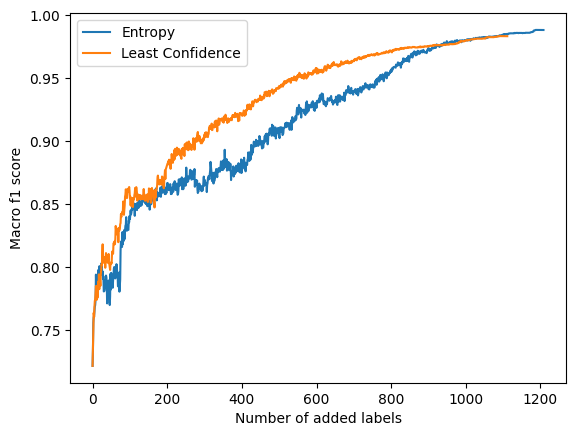

In [53]:
print("Entropy macro f1 score: ", entropy_macro_f1[-1])
print("Least confidence macro f1 score: ", least_confidence_macro_f1[-1])

# plot macro f1 score
plt.plot(entropy_macro_f1, label='Entropy')
plt.plot(least_confidence_macro_f1, label='Least Confidence')
plt.xlabel('Number of added labels')
plt.ylabel('Macro f1 score')
plt.legend()
plt.show()

In [54]:
# predict probabilities for test set
print("Entropy query strategy")
y_pred = entropy_model.predict(X_test)
print(y_pred)

# f1 macro score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
print(classification_report(y_test_categorical, y_pred))

Entropy query strategy
[4 4 5 ... 2 5 4]
Test F1 Macro Score: 0.9235594612867827
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       449
           1       0.85      0.81      0.83        27
           2       0.91      0.96      0.93        93
           3       0.94      0.90      0.92       377
           4       0.95      0.98      0.96       529
           5       0.97      0.91      0.94       363

    accuracy                           0.94      1838
   macro avg       0.93      0.92      0.92      1838
weighted avg       0.94      0.94      0.94      1838



In [55]:
# predict probabilities for test set
print("Least confidence query strategy")
y_pred = least_confidence_model.predict(X_test)
print(y_pred)

# f1 macro score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
print(classification_report(y_test_categorical, y_pred))

Least confidence query strategy
[4 4 5 ... 2 5 4]
Test F1 Macro Score: 0.9261552667235265
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       449
           1       0.86      0.89      0.87        27
           2       0.91      0.96      0.93        93
           3       0.93      0.89      0.91       377
           4       0.94      0.98      0.96       529
           5       0.96      0.92      0.94       363

    accuracy                           0.94      1838
   macro avg       0.92      0.93      0.93      1838
weighted avg       0.94      0.94      0.94      1838

